# Load the libraries

In [8]:
library(data.table);
library(ggplot2);
library(repr)
library(reshape2)
##library(gplots)
library(pheatmap)
library(cowplot)
source("pca_cell_type_plot.R")

In [9]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res=80)
name <- "CLUESImmVar_processed.v3";

# Load the necessary input

## Load the processed expression data from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [10]:
cm_sle_expr <- fread("v2.expr/v2.CD14+.Monocytes.expr.matrix.eqtl.txt");
colnames(cm_sle_expr) <- sapply(colnames(cm_sle_expr), function(x) {strsplit(x,"_")[[1]][[1]]})
expr_gene_names <- cm_sle_expr$gene;
cm_sle_expr <- as.matrix(cm_sle_expr[,-1]);

th_sle_expr <- as.matrix(fread("v2.expr/v2.CD4.T.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(th_sle_expr) <- sapply(colnames(th_sle_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_sle_expr <- as.matrix(fread("v2.expr/v2.CD8.T.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(tc_sle_expr) <- sapply(colnames(tc_sle_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_sle_expr <- as.matrix(fread("v2.expr/v2.FCGR3A+.Monocytes.expr.matrix.eqtl.txt")[,-1]);
colnames(ncm_sle_expr) <- sapply(colnames(ncm_sle_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

b_sle_expr <- as.matrix(fread("v2.expr/v2.B.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(b_sle_expr) <- sapply(colnames(b_sle_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_sle_expr <- as.matrix(fread("v2.expr/v2.NK.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(nk_sle_expr) <- sapply(colnames(nk_sle_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

dc_sle_expr <- as.matrix(fread("v2.expr/v2.Dendritic.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(dc_sle_expr) <- sapply(colnames(dc_sle_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_sle_expr <- as.matrix(fread("v2.expr/v2.PBMC.expr.matrix.eqtl.txt")[,-1]);
colnames(pbmc_sle_expr) <- sapply(colnames(pbmc_sle_expr), function(x) {strsplit(x,"_")[[1]][[1]]})


## load the ImmVar samples that we processed

In [11]:
cm_healthy_ucsf_expr <- as.matrix(fread("v2.expr/v2.healthy.CD14+.Monocytes.expr.matrix.eqtl.txt")[,-1]);
colnames(cm_healthy_ucsf_expr) <- sapply(colnames(cm_healthy_ucsf_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

th_healthy_ucsf_expr <- as.matrix(fread("v2.expr/v2.healthy.CD4.T.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(th_healthy_ucsf_expr) <- sapply(colnames(th_healthy_ucsf_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_healthy_ucsf_expr <- as.matrix(fread("v2.expr/v2.healthy.CD8.T.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(tc_healthy_ucsf_expr) <- sapply(colnames(tc_healthy_ucsf_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_healthy_ucsf_expr <- as.matrix(fread("v2.expr/v2.healthy.FCGR3A+.Monocytes.expr.matrix.eqtl.txt")[,-1]);
colnames(ncm_healthy_ucsf_expr) <- sapply(colnames(ncm_healthy_ucsf_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

b_healthy_ucsf_expr <- as.matrix(fread("v2.expr/v2.healthy.B.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(b_healthy_ucsf_expr) <- sapply(colnames(b_healthy_ucsf_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_healthy_ucsf_expr <- as.matrix(fread("v2.expr/v2.healthy.NK.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(nk_healthy_ucsf_expr) <- sapply(colnames(nk_healthy_ucsf_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

dc_healthy_ucsf_expr <- as.matrix(fread("v2.expr/v2.healthy.Dendritic.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(dc_healthy_ucsf_expr) <- sapply(colnames(dc_healthy_ucsf_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_healthy_ucsf_expr <- as.matrix(fread("v2.expr/v2.healthy.PBMC.expr.matrix.eqtl.txt")[,-1]);
colnames(pbmc_healthy_ucsf_expr) <- sapply(colnames(pbmc_healthy_ucsf_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

## load the ImmVar samples the Broad processed

In [12]:
cm_healthy_broad_expr <- as.matrix(fread("gracie.immvar.50/v1.CD14+.Monocytes.expr.matrix.eqtl.txt")[,-1]);
colnames(cm_healthy_broad_expr) <- sapply(colnames(cm_healthy_broad_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

th_healthy_broad_expr <- as.matrix(fread("gracie.immvar.50/v1.CD4.T.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(th_healthy_broad_expr) <- sapply(colnames(th_healthy_broad_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_healthy_broad_expr <- as.matrix(fread("gracie.immvar.50/v1.CD8.T.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(tc_healthy_broad_expr) <- sapply(colnames(tc_healthy_broad_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_healthy_broad_expr <- as.matrix(fread("gracie.immvar.50/v1.FCGR3A+.Monocytes.expr.matrix.eqtl.txt")[,-1]);
colnames(ncm_healthy_broad_expr) <- sapply(colnames(ncm_healthy_broad_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

b_healthy_broad_expr <- as.matrix(fread("gracie.immvar.50/v1.B.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(b_healthy_broad_expr) <- sapply(colnames(b_healthy_broad_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_healthy_broad_expr <- as.matrix(fread("gracie.immvar.50/v1.NK.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(nk_healthy_broad_expr) <- sapply(colnames(nk_healthy_broad_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

dc_healthy_broad_expr <- as.matrix(fread("gracie.immvar.50/v1.Dendritic.cells.expr.matrix.eqtl.txt")[,-1]);
colnames(dc_healthy_broad_expr) <- sapply(colnames(dc_healthy_broad_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_healthy_broad_expr <- as.matrix(fread("gracie.immvar.50/v1.PBMC.expr.matrix.eqtl.txt")[,-1]);
colnames(pbmc_healthy_broad_expr) <- sapply(colnames(pbmc_healthy_broad_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

## set the final ImmVar samples

In [13]:
# cm_healthy_expr <- cbind(cm_healthy_ucsf_expr, cm_healthy_broad_expr)
# th_healthy_expr <- cbind(th_healthy_ucsf_expr, th_healthy_broad_expr)
# tc_healthy_expr <- cbind(tc_healthy_ucsf_expr, tc_healthy_broad_expr)
# ncm_healthy_expr <- cbind(ncm_healthy_ucsf_expr, ncm_healthy_broad_expr)
# b_healthy_expr <- cbind(b_healthy_ucsf_expr, b_healthy_broad_expr)
# nk_healthy_expr <- cbind(nk_healthy_ucsf_expr, nk_healthy_broad_expr)
# dc_healthy_expr <- cbind(dc_healthy_ucsf_expr, dc_healthy_broad_expr)
# pbmc_healthy_expr <- cbind(pbmc_healthy_ucsf_expr, pbmc_healthy_broad_expr)

cm_healthy_expr <- cm_healthy_broad_expr
th_healthy_expr <- th_healthy_broad_expr
tc_healthy_expr <- tc_healthy_broad_expr
ncm_healthy_expr <- ncm_healthy_broad_expr
b_healthy_expr <- b_healthy_broad_expr
nk_healthy_expr <- nk_healthy_broad_expr
dc_healthy_expr <- dc_healthy_broad_expr
pbmc_healthy_expr <- pbmc_healthy_broad_expr

In [14]:
cm_expr <- cbind(cm_sle_expr, cm_healthy_expr);
th_expr <- cbind(th_sle_expr, th_healthy_expr);
tc_expr <- cbind(tc_sle_expr, tc_healthy_expr);
ncm_expr <- cbind(ncm_sle_expr, ncm_healthy_expr);
b_expr <- cbind(b_sle_expr, b_healthy_expr);
nk_expr <- cbind(nk_sle_expr, nk_healthy_expr);
dc_expr <- cbind(dc_sle_expr, dc_healthy_expr);
pbmc_expr <- cbind(pbmc_sle_expr, pbmc_healthy_expr);
rownames(pbmc_expr) <- rownames(cm_expr) <- rownames(th_expr) <- rownames(tc_expr) <- rownames(ncm_expr) <- rownames(b_expr) <- rownames(nk_expr) <-rownames(dc_expr) <- expr_gene_names;

standardize <- function(x) {(x-mean(x))/sd(x)}

pbmc_expr_std <- t(apply(pbmc_expr,1,standardize))
cm_expr_std <- t(apply(cm_expr,1,standardize))
cm_expr_std[is.na(cm_expr_std)] <- 0
th_expr_std <- t(apply(th_expr,1,standardize))
th_expr_std[is.na(th_expr_std)] <- 0
b_expr_std <- t(apply(b_expr,1,standardize))
b_expr_std[is.na(b_expr_std)] <- 0
nk_expr_std <- t(apply(nk_expr,1,standardize))
nk_expr_std[is.na(nk_expr_std)] <- 0
ncm_expr_std <- t(apply(ncm_expr,1,standardize))
ncm_expr_std[is.na(ncm_expr_std)] <- 0
tc_expr_std <- t(apply(tc_expr,1,standardize))
tc_expr_std[is.na(tc_expr_std)] <- 0
dc_expr_std <- t(apply(dc_expr,1,standardize))
dc_expr_std[is.na(dc_expr_std)] <- 0


In [15]:
pbmc_expr_prcomp <- prcomp(pbmc_expr)

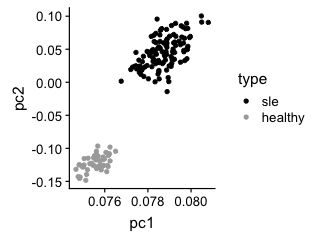

In [16]:
df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[1:ncol(pbmc_sle_expr),1], pc2=pbmc_expr_prcomp$rotation[1:ncol(pbmc_sle_expr),2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[(ncol(pbmc_sle_expr)+1):ncol(pbmc_expr),1], pc2=pbmc_expr_prcomp$rotation[(ncol(pbmc_sle_expr)+1):ncol(pbmc_expr),2], type="healthy"))

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray"))

## Load the raw counts from ```/ye/yelabstore2/10x.lupus/disease/demux.v2```

In [17]:
## either load only the original samples

# cm_counts <- fread("v2.deseq/norep.noadjrace.CD14+.Monocytes.counts.txt");
# colnames(cm_counts) <- sapply(colnames(cm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# th_counts <- fread("v2.deseq/norep.noadjrace.CD4.T.cells.counts.txt");
# colnames(th_counts) <- sapply(colnames(th_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# tc_counts <- fread("v2.deseq/norep.noadjrace.CD8.T.cells.counts.txt");
# colnames(tc_counts) <- sapply(colnames(tc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# ncm_counts <- fread("v2.deseq/norep.noadjrace.FCGR3A+.Monocytes.counts.txt");
# colnames(ncm_counts) <- sapply(colnames(ncm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# b_counts <- fread("v2.deseq/norep.noadjrace.B.cells.counts.txt");
# colnames(b_counts) <- sapply(colnames(b_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# nk_counts <- fread("v2.deseq/norep.noadjrace.NK.cells.counts.txt");
# colnames(nk_counts) <- sapply(colnames(nk_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# dc_counts <- fread("v2.deseq/norep.noadjrace.Dendritic.cells.counts.txt");
# colnames(dc_counts) <- sapply(colnames(dc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# pbmc_counts <- fread("v2.deseq/norep.noadjrace.PBMC.counts.txt");
# colnames(pbmc_counts) <- sapply(colnames(pbmc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})


## or new with immvar as separate

cm_counts <- fread("v2.deseq/fullimmvar.CD14+.Monocytes.counts.txt");
colnames(cm_counts) <- sapply(colnames(cm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

th_counts <- fread("v2.deseq/fullimmvar.CD4.T.cells.counts.txt");
colnames(th_counts) <- sapply(colnames(th_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_counts <- fread("v2.deseq/fullimmvar.CD8.T.cells.counts.txt");
colnames(tc_counts) <- sapply(colnames(tc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_counts <- fread("v2.deseq/fullimmvar.FCGR3A+.Monocytes.counts.txt");
colnames(ncm_counts) <- sapply(colnames(ncm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

b_counts <- fread("v2.deseq/fullimmvar.B.cells.counts.txt");
colnames(b_counts) <- sapply(colnames(b_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_counts <- fread("v2.deseq/fullimmvar.NK.cells.counts.txt");
colnames(nk_counts) <- sapply(colnames(nk_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

dc_counts <- fread("v2.deseq/fullimmvar.Dendritic.cells.counts.txt");
colnames(dc_counts) <- sapply(colnames(dc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_counts <- fread("v2.deseq/fullimmvar.PBMC.counts.txt");
colnames(pbmc_counts) <- sapply(colnames(pbmc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})


counts_gene_names <- cm_counts$gene;
cm_counts <- as.matrix(cm_counts[,-1]);
pbmc_counts <- as.matrix(pbmc_counts[,-1]);
th_counts <- as.matrix(th_counts[,-1]);
tc_counts <- as.matrix(tc_counts[,-1]);
b_counts <- as.matrix(b_counts[,-1]);
ncm_counts <- as.matrix(ncm_counts[,-1]);
nk_counts <- as.matrix(nk_counts[,-1]);
dc_counts <- as.matrix(dc_counts[,-1]);

all_counts_samples <- na.omit(match(colnames(pbmc_expr), colnames(pbmc_counts)))

cm_counts <- cm_counts[,all_counts_samples]
pbmc_counts <- pbmc_counts[,all_counts_samples]
th_counts <- th_counts[,all_counts_samples]
tc_counts <- tc_counts[,all_counts_samples]
b_counts <- b_counts[,all_counts_samples]
ncm_counts <- ncm_counts[,all_counts_samples]
nk_counts <- nk_counts[,all_counts_samples]
dc_counts <- dc_counts[,all_counts_samples]

sle_counts_samples <- na.omit(match(colnames(pbmc_sle_expr), colnames(pbmc_counts)))

cm_sle_counts <- cm_counts[,sle_counts_samples]
th_sle_counts <- th_counts[,sle_counts_samples]
tc_sle_counts <- tc_counts[,sle_counts_samples]
ncm_sle_counts <- ncm_counts[,sle_counts_samples]
b_sle_counts <- b_counts[,sle_counts_samples]
nk_sle_counts <- nk_counts[,sle_counts_samples]
dc_sle_counts <- dc_counts[,sle_counts_samples]
pbmc_sle_counts <- pbmc_counts[,sle_counts_samples]


healthy_counts_samples <- na.omit(match(colnames(pbmc_healthy_expr), colnames(pbmc_counts)))

cm_healthy_counts <- cm_counts[,healthy_counts_samples]
th_healthy_counts <- th_counts[,healthy_counts_samples]
tc_healthy_counts <- tc_counts[,healthy_counts_samples]
ncm_healthy_counts <- ncm_counts[,healthy_counts_samples]
b_healthy_counts <- b_counts[,healthy_counts_samples]
nk_healthy_counts <- nk_counts[,healthy_counts_samples]
dc_healthy_counts <- dc_counts[,healthy_counts_samples]
pbmc_healthy_counts <- pbmc_counts[,healthy_counts_samples]



## Load the covariates from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [18]:
pbmc_covars <- as.data.frame(fread("v2.expr/v2.PBMC.covs.use.txt"))[,-1];
cm_covars <- as.data.frame(fread("v2.expr/v2.CD14+.Monocytes.covs.use.txt"))[,-1];
th_covars <- as.data.frame(fread("v2.expr/v2.CD4.T.cells.covs.use.txt"))[,-1];
tc_covars <- as.data.frame(fread("v2.expr/v2.CD8.T.cells.covs.use.txt"))[,-1];
ncm_covars <- as.data.frame(fread("v2.expr/v2.FCGR3A+.Monocytes.covs.use.txt"))[,-1];
b_covars <- as.data.frame(fread("v2.expr/v2.B.cells.covs.use.txt"))[,-1];
dc_covars <- as.data.frame(fread("v2.expr/v2.Dendritic.cells.covs.use.txt"))[,-1];

Warning message in fread("v2.expr/v2.PBMC.covs.use.txt"):
“Detected 119 column names but the data has 120 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v2.expr/v2.CD14+.Monocytes.covs.use.txt"):
“Detected 119 column names but the data has 120 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v2.expr/v2.CD4.T.cells.covs.use.txt"):
“Detected 119 column names but the data has 120 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnam

## Load the differentially expression results

In [19]:
pbmc_deseq <- fread("v2.deseq/norep.noadjrace.PBMC.deseq.txt")##as.data.frame()
th_deseq <- as.data.frame(fread("v2.deseq/norep.noadjrace.CD4.T.cells.deseq.txt"))
tc_deseq <- as.data.frame(fread("v2.deseq/norep.noadjrace.CD8.T.cells.deseq.txt"))
cm_deseq <- as.data.frame(fread("v2.deseq/norep.noadjrace.CD14+.Monocytes.deseq.txt"))
ncm_deseq <- as.data.frame(fread("v2.deseq/norep.noadjrace.FCGR3A+.Monocytes.deseq.txt"))
b_deseq <- as.data.frame(fread("v2.deseq/norep.noadjrace.B.cells.deseq.txt"))
nk_deseq <- as.data.frame(fread("v2.deseq/norep.noadjrace.NK.cells.deseq.txt"))
dc_deseq <- as.data.frame(fread("v2.deseq/norep.noadjrace.Dendritic.cells.deseq.txt"))

pbmc_deseq_sig <- as.data.frame(fread("v2.deseq/norep.noadjrace.PBMC.deseq.sig.txt",header=F))$V1
th_deseq_sig <- as.data.frame(fread("v2.deseq/norep.noadjrace.CD4.T.cells.deseq.sig.txt",header=F))$V1
tc_deseq_sig <- as.data.frame(fread("v2.deseq/norep.noadjrace.CD8.T.cells.deseq.sig.txt",header=F))$V1
cm_deseq_sig <- as.data.frame(fread("v2.deseq/norep.noadjrace.CD14+.Monocytes.deseq.sig.txt",header=F))$V1
ncm_deseq_sig <- as.data.frame(fread("v2.deseq/norep.noadjrace.FCGR3A+.Monocytes.deseq.sig.txt",header=F))$V1
b_deseq_sig <- as.data.frame(fread("v2.deseq/norep.noadjrace.B.cells.deseq.sig.txt",header=F))$V1
nk_deseq_sig <- as.data.frame(fread("v2.deseq/norep.noadjrace.NK.cells.deseq.sig.txt",header=F))$V1
dc_deseq_sig <- as.data.frame(fread("v2.deseq/norep.noadjrace.Dendritic.cells.deseq.sig.txt",header=F))$V1
union_deseq_sig <- unique(c(pbmc_deseq_sig, cm_deseq_sig, th_deseq_sig, tc_deseq_sig, b_deseq_sig, ncm_deseq_sig, nk_deseq_sig, dc_deseq_sig));

Warning message in fread("v2.deseq/norep.noadjrace.PBMC.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v2.deseq/norep.noadjrace.CD4.T.cells.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v2.deseq/norep.noadjrace.CD8.T.cells.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an 

In [20]:
pbmc_deseq_sig_genes <- pbmc_deseq$V1[intersect(which(abs(pbmc_deseq$log2FoldChange)>1),which(pbmc_deseq$qval < 0.05))]
cm_deseq_sig_genes <- cm_deseq$V1[intersect(which(abs(cm_deseq$log2FoldChange)>1),which(cm_deseq$qval < 0.05))]
th_deseq_sig_genes <- th_deseq$V1[intersect(which(abs(th_deseq$log2FoldChange)>1),which(th_deseq$qval < 0.05))]
tc_deseq_sig_genes <- tc_deseq$V1[intersect(which(abs(tc_deseq$log2FoldChange)>1),which(tc_deseq$qval < 0.05))]
b_deseq_sig_genes <- b_deseq$V1[intersect(which(abs(b_deseq$log2FoldChange)>1),which(b_deseq$qval < 0.05))]
ncm_deseq_sig_genes <- ncm_deseq$V1[intersect(which(abs(ncm_deseq$log2FoldChange)>1),which(ncm_deseq$qval < 0.05))]
nk_deseq_sig_genes <- nk_deseq$V1[intersect(which(abs(nk_deseq$log2FoldChange)>1),which(nk_deseq$qval < 0.05))]
dc_deseq_sig_genes <- dc_deseq$V1[intersect(which(abs(dc_deseq$log2FoldChange)>1),which(dc_deseq$qval < 0.05))]

# union_deseq_sig_genes <- unique(c(pbmc_deseq_sig_genes, cm_deseq_sig_genes, ncm_deseq_sig_genes, dc_deseq_sig_genes, th_deseq_sig_genes, tc_deseq_sig_genes,  nk_deseq_sig_genes,b_deseq_sig_genes))
# union_deseq_sig_genes <- intersect(union_deseq_sig_genes, pbmc_deseq$V1[which(pbmc_deseq$baseMean>20)])
# length(union_deseq_sig_genes)
# length(pbmc_deseq_sig_genes)
# length(intersect(pbmc_deseq_sig_genes, union_deseq_sig_genes))
# union_deseq_sig_genes <- union_deseq_sig_genes[-grep("IGLL5",union_deseq_sig_genes)]

In [21]:
standardize <- function(x) {(x-mean(x))/sd(x)}

all_expr_standardize <- data.frame(pbmc=t(apply(pbmc_expr,1,standardize)),
                      cm=t(apply(cm_expr,1,standardize)),
                      ncm=t(apply(ncm_expr,1,standardize)),
                      dc=t(apply(dc_expr,1,standardize)),
                      th=t(apply(th_expr,1,standardize)),
                      tc=t(apply(tc_expr,1,standardize)),
                       nk=t(apply(nk_expr,1,standardize)),
                      b=t(apply(b_expr,1,standardize)),
                        dc=t(apply(dc_expr,1,standardize))
                      )


all_expr <- data.frame(pbmc=pbmc_expr,
                      cm=cm_expr,
                      ncm=ncm_expr,
                      dc=dc_expr,
                      th=th_expr,
                      tc=tc_expr,
                       nk=nk_expr,
                      b=b_expr
                      )

all_expr_sle <- data.frame(pbmc=pbmc_sle_expr,
                      cm=cm_sle_expr,
                      ncm=ncm_sle_expr,
                      dc=dc_sle_expr,
                      th=th_sle_expr,
                      tc=tc_sle_expr,
                       nk=nk_sle_expr,
                      b=b_sle_expr
                      )
rownames(all_expr_sle) <- rownames(all_expr)


In [22]:
set.seed(1)
kmeans_rst <- kmeans(all_expr[match(pbmc_deseq_sig_genes,expr_gene_names),], 7)

cell_types <- c("PBMC","cM","ncM", "DC","Th","Tc","NK","B")
ct_annotation <- data.frame(type=factor(rep(cell_types,each=ncol(ncm_expr))),
                           disease=factor(rep(c(rep("sle",ncol(cm_sle_expr)),rep("ctrl",ncol(cm_healthy_expr))),length(cell_types))))
rownames(ct_annotation) <- colnames(all_expr);

kmeans_annotation <- data.frame(cluster=factor(kmeans_rst$cluster,levels=c("1","2","6","11","13","15","12","7","8","3","9","10","14","4","5")))
rownames(kmeans_annotation) <- pbmc_deseq_sig_genes;

all_expr_sig <- all_expr[match(pbmc_deseq_sig_genes,expr_gene_names),]
all_expr_sig_ordered <- all_expr[match(pbmc_deseq_sig_genes,expr_gene_names),][order(kmeans_annotation$cluster),]
kmeans_ordered_annotation <- kmeans_annotation[order(kmeans_annotation$cluster),]

all_expr_sle_sig <- all_expr_sle[match(pbmc_deseq_sig_genes,expr_gene_names),]
all_expr_sle_sig_ordered <- all_expr_sle[match(pbmc_deseq_sig_genes,expr_gene_names),][order(kmeans_annotation$cluster),]
##kmeans_ordered_annotation <- kmeans_annotation[order(kmeans_annotation$cluster),]


##bct_annotation <- list(ct_annotation=ct_annotation)

## Load the joined table and preprocess the expression and counts data

In [23]:
joined_pivot <- fread(paste(name,'_joined_pivot_ct_perc.txt', sep=""), sep=",")
joined_pivot <- as.data.frame(joined_pivot);
joined_pivot$batch_cov <- as.factor(joined_pivot$batch_cov)

joined_pivot_filtered <- joined_pivot[match(c(colnames(pbmc_sle_expr),colnames(pbmc_healthy_expr)),joined_pivot$ind_cov),]
joined_pivot_sle <- joined_pivot[match(colnames(pbmc_sle_expr), joined_pivot$ind_cov),]
joined_pivot_healthy <- joined_pivot[match(colnames(pbmc_healthy_expr), joined_pivot$ind_cov),]

## get the cell type proportions

In [24]:
cm_prop = joined_pivot_filtered$"CD14 Mo";##/joined_pivot_filtered$pbmc;
th_prop = joined_pivot_filtered$"CD4+ T";##/joined_pivot_filtered$pbmc;
b_prop = joined_pivot_filtered$"B";##/joined_pivot_filtered$pbmc;
nk_prop = joined_pivot_filtered$"NK";##/joined_pivot_filtered$pbmc;
ncm_prop = joined_pivot_filtered$"CD16 Mo";#/joined_pivot_filtered$pbmc;
tc_prop = joined_pivot_filtered$"CD8+ T";#/joined_pivot_filtered$pbmc;
dc_prop = joined_pivot_filtered$"cDC";#/joined_pivot_filtered$pbmc;

## set the NAs to 0
b_prop[which(is.na(b_prop))] <- 0;
dc_prop[which(is.na(dc_prop))] <- 0;

cm_sle_prop = cm_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
th_sle_prop = th_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
b_sle_prop = b_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
nk_sle_prop = nk_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
ncm_sle_prop = ncm_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
tc_sle_prop = tc_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
dc_sle_prop = dc_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]

cm_healthy_prop = cm_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
th_healthy_prop = th_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
b_healthy_prop = b_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
nk_healthy_prop = nk_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
ncm_healthy_prop = ncm_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
tc_healthy_prop = tc_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
dc_healthy_prop = dc_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]

In [25]:
dim(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, dc_prop))))

[1] 165 165

In [26]:
dim(cor(cbind(pbmc_expr_std)))

[1] 165 165

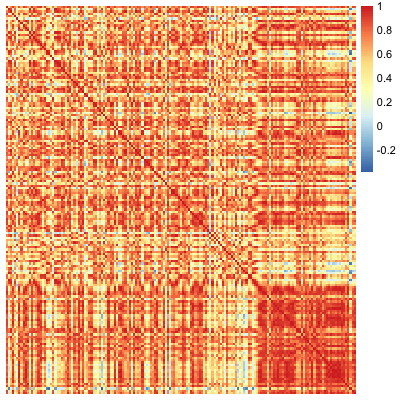

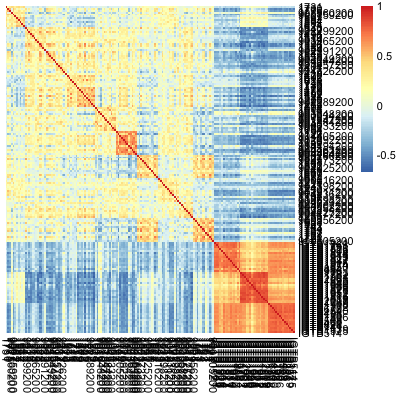

In [27]:
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, dc_prop))),cluster_rows=F,cluster_cols=F)
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(cbind(pbmc_expr_std)),cluster_rows=F,cluster_cols=F)

# Let's do some batch adjustments

## first, let's cell type proportion

In [28]:
cm_prop_mean = lm(cm_prop~1)$fitted;
th_prop_mean = lm(th_prop~1)$fitted;
b_prop_mean = lm(b_prop~1)$fitted;
nk_prop_mean = lm(nk_prop~1)$fitted;
ncm_prop_mean = lm(ncm_prop~1)$fitted;
tc_prop_mean = lm(tc_prop~1)$fitted;
dc_prop_mean = lm(dc_prop~1)$fitted;

cm_prop = lm(cm_prop~joined_pivot_filtered$batch_cov)$residual+cm_prop_mean;
th_prop = lm(th_prop~joined_pivot_filtered$batch_cov)$residual+th_prop_mean;
b_prop = lm(b_prop~joined_pivot_filtered$batch_cov)$residual+b_prop_mean;
nk_prop = lm(nk_prop~joined_pivot_filtered$batch_cov)$residual+nk_prop_mean;
ncm_prop = lm(ncm_prop~joined_pivot_filtered$batch_cov)$residual+ncm_prop_mean;
tc_prop = lm(tc_prop~joined_pivot_filtered$batch_cov)$residual+tc_prop_mean;
dc_prop = lm(dc_prop~joined_pivot_filtered$batch_cov)$residual+dc_prop_mean;

cm_sle_prop_mean = lm(cm_sle_prop~1)$fitted;
th_sle_prop_mean = lm(th_sle_prop~1)$fitted;
b_sle_prop_mean = lm(b_sle_prop~1)$fitted;
ncm_sle_prop_mean = lm(ncm_sle_prop~1)$fitted;
nk_sle_prop_mean = lm(nk_sle_prop~1)$fitted;
tc_sle_prop_mean = lm(tc_sle_prop~1)$fitted;
dc_sle_prop_mean = lm(dc_sle_prop~1)$fitted;

cm_sle_prop = lm(cm_sle_prop~joined_pivot_sle$batch_cov)$residual+cm_sle_prop_mean;
th_sle_prop = lm(th_sle_prop~joined_pivot_sle$batch_cov)$residual+th_sle_prop_mean;
b_sle_prop = lm(b_sle_prop~joined_pivot_sle$batch_cov)$residual+b_sle_prop_mean;
nk_sle_prop = lm(nk_sle_prop~joined_pivot_sle$batch_cov)$residual+nk_sle_prop_mean;
ncm_sle_prop = lm(ncm_sle_prop~joined_pivot_sle$batch_cov)$residual+ncm_sle_prop_mean;
tc_sle_prop = lm(tc_sle_prop~joined_pivot_sle$batch_cov)$residual+tc_sle_prop_mean;
dc_sle_prop = lm(dc_sle_prop~joined_pivot_sle$batch_cov)$residual+dc_sle_prop_mean;

cm_healthy_prop_mean = lm(cm_healthy_prop~1)$fitted;
th_healthy_prop_mean = lm(th_healthy_prop~1)$fitted;
b_healthy_prop_mean = lm(b_healthy_prop~1)$fitted;
ncm_healthy_prop_mean = lm(ncm_healthy_prop~1)$fitted;
nk_healthy_prop_mean = lm(nk_healthy_prop~1)$fitted;
tc_healthy_prop_mean = lm(tc_healthy_prop~1)$fitted;
dc_healthy_prop_mean = lm(dc_healthy_prop~1)$fitted;

cm_healthy_prop = lm(cm_healthy_prop~joined_pivot_healthy$batch_cov)$residual+cm_healthy_prop_mean;
th_healthy_prop = lm(th_healthy_prop~joined_pivot_healthy$batch_cov)$residual+th_healthy_prop_mean;
b_healthy_prop = lm(b_healthy_prop~joined_pivot_healthy$batch_cov)$residual+b_healthy_prop_mean;
nk_healthy_prop = lm(nk_healthy_prop~joined_pivot_healthy$batch_cov)$residual+nk_healthy_prop_mean;
ncm_healthy_prop = lm(ncm_healthy_prop~joined_pivot_healthy$batch_cov)$residual+ncm_healthy_prop_mean;
tc_healthy_prop = lm(tc_healthy_prop~joined_pivot_healthy$batch_cov)$residual+tc_healthy_prop_mean;
dc_healthy_prop = lm(dc_healthy_prop~joined_pivot_healthy$batch_cov)$residual+dc_healthy_prop_mean;

## second, let's adjust cell type specific expression

In [29]:
pbmc_mean <- t(lm(t(pbmc_expr)~1)$fitted)
cm_mean <- t(lm(t(cm_expr)~1)$fitted)
th_mean <- t(lm(t(th_expr)~1)$fitted)
b_mean <- t(lm(t(b_expr)~1)$fitted)
nk_mean <- t(lm(t(nk_expr)~1)$fitted)
ncm_mean <- t(lm(t(ncm_expr)~1)$fitted)
tc_mean <- t(lm(t(tc_expr)~1)$fitted)
dc_mean <- t(lm(t(dc_expr)~1)$fitted)

pbmc_expr <- t(lm(t(pbmc_expr)~joined_pivot_filtered$batch_cov)$residuals)+pbmc_mean
cm_expr <- t(lm(t(cm_expr)~joined_pivot_filtered$batch_cov)$residuals)+cm_mean
th_expr <- t(lm(t(th_expr)~joined_pivot_filtered$batch_cov)$residuals)+th_mean
b_expr <- t(lm(t(b_expr)~joined_pivot_filtered$batch_cov)$residuals)+b_mean
nk_expr <- t(lm(t(nk_expr)~joined_pivot_filtered$batch_cov)$residuals)+nk_mean
ncm_expr <- t(lm(t(ncm_expr)~joined_pivot_filtered$batch_cov)$residuals)+ncm_mean
tc_expr <- t(lm(t(tc_expr)~joined_pivot_filtered$batch_cov)$residuals)+tc_mean
dc_expr <- t(lm(t(dc_expr)~joined_pivot_filtered$batch_cov)$residuals)+dc_mean

pbmc_expr_std <- t(apply(pbmc_expr,1,standardize))
cm_expr_std <- t(apply(cm_expr,1,standardize))
cm_expr_std[is.na(cm_expr_std)] <- 0
th_expr_std <- t(apply(th_expr,1,standardize))
th_expr_std[is.na(th_expr_std)] <- 0
b_expr_std <- t(apply(b_expr,1,standardize))
b_expr_std[is.na(b_expr_std)] <- 0
nk_expr_std <- t(apply(nk_expr,1,standardize))
nk_expr_std[is.na(nk_expr_std)] <- 0
ncm_expr_std <- t(apply(ncm_expr,1,standardize))
ncm_expr_std[is.na(ncm_expr_std)] <- 0
tc_expr_std <- t(apply(tc_expr,1,standardize))
tc_expr_std[is.na(tc_expr_std)] <- 0
dc_expr_std <- t(apply(dc_expr,1,standardize))
dc_expr_std[is.na(dc_expr_std)] <- 0


pbmc_sle_mean <- t(lm(t(pbmc_sle_expr)~1)$fitted)
cm_sle_mean <- t(lm(t(cm_sle_expr)~1)$fitted)
th_sle_mean <- t(lm(t(th_sle_expr)~1)$fitted)
b_sle_mean <- t(lm(t(b_sle_expr)~1)$fitted)
nk_sle_mean <- t(lm(t(nk_sle_expr)~1)$fitted)
ncm_sle_mean <- t(lm(t(ncm_sle_expr)~1)$fitted)
tc_sle_mean <- t(lm(t(tc_sle_expr)~1)$fitted)
dc_sle_mean <- t(lm(t(dc_sle_expr)~1)$fitted)

pbmc_sle_expr <- t(lm(t(pbmc_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+pbmc_sle_mean
cm_sle_expr <- t(lm(t(cm_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+cm_sle_mean
th_sle_expr <- t(lm(t(th_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+th_sle_mean
b_sle_expr <- t(lm(t(b_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+b_sle_mean
nk_sle_expr <- t(lm(t(nk_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+nk_sle_mean
ncm_sle_expr <- t(lm(t(ncm_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+ncm_sle_mean
tc_sle_expr <- t(lm(t(tc_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+tc_sle_mean
dc_sle_expr <- t(lm(t(dc_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+dc_sle_mean


pbmc_sle_expr_std <- t(apply(pbmc_sle_expr,1,standardize))
cm_sle_expr_std <- t(apply(cm_sle_expr,1,standardize))
cm_sle_expr_std[is.na(cm_sle_expr_std)] <- 0
th_sle_expr_std <- t(apply(th_sle_expr,1,standardize))
th_sle_expr_std[is.na(th_sle_expr_std)] <- 0
b_sle_expr_std <- t(apply(b_sle_expr,1,standardize))
b_sle_expr_std[is.na(b_sle_expr_std)] <- 0
nk_sle_expr_std <- t(apply(nk_sle_expr,1,standardize))
nk_sle_expr_std[is.na(nk_sle_expr_std)] <- 0
ncm_sle_expr_std <- t(apply(ncm_sle_expr,1,standardize))
ncm_sle_expr_std[is.na(ncm_sle_expr_std)] <- 0
tc_sle_expr_std <- t(apply(tc_sle_expr,1,standardize))
tc_sle_expr_std[is.na(tc_sle_expr_std)] <- 0
dc_sle_expr_std <- t(apply(dc_sle_expr,1,standardize))
dc_sle_expr_std[is.na(dc_sle_expr_std)] <- 0


pbmc_healthy_mean <- t(lm(t(pbmc_healthy_expr)~1)$fitted)
cm_healthy_mean <- t(lm(t(cm_healthy_expr)~1)$fitted)
th_healthy_mean <- t(lm(t(th_healthy_expr)~1)$fitted)
b_healthy_mean <- t(lm(t(b_healthy_expr)~1)$fitted)
nk_healthy_mean <- t(lm(t(nk_healthy_expr)~1)$fitted)
ncm_healthy_mean <- t(lm(t(ncm_healthy_expr)~1)$fitted)
tc_healthy_mean <- t(lm(t(tc_healthy_expr)~1)$fitted)
dc_healthy_mean <- t(lm(t(dc_healthy_expr)~1)$fitted)

pbmc_healthy_expr <- t(lm(t(pbmc_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+pbmc_healthy_mean
cm_healthy_expr <- t(lm(t(cm_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+cm_healthy_mean
th_healthy_expr <- t(lm(t(th_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+th_healthy_mean
b_healthy_expr <- t(lm(t(b_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+b_healthy_mean
nk_healthy_expr <- t(lm(t(nk_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+nk_healthy_mean
ncm_healthy_expr <- t(lm(t(ncm_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+ncm_healthy_mean
tc_healthy_expr <- t(lm(t(tc_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+tc_healthy_mean
dc_healthy_expr <- t(lm(t(dc_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+dc_healthy_mean

pbmc_healthy_expr_std <- t(apply(pbmc_healthy_expr,1,standardize))
cm_healthy_expr_std <- t(apply(cm_healthy_expr,1,standardize))
cm_healthy_expr_std[is.na(cm_healthy_expr_std)] <- 0
th_healthy_expr_std <- t(apply(th_healthy_expr,1,standardize))
th_healthy_expr_std[is.na(th_healthy_expr_std)] <- 0
b_healthy_expr_std <- t(apply(b_healthy_expr,1,standardize))
b_healthy_expr_std[is.na(b_healthy_expr_std)] <- 0
nk_healthy_expr_std <- t(apply(nk_healthy_expr,1,standardize))
nk_healthy_expr_std[is.na(nk_healthy_expr_std)] <- 0
ncm_healthy_expr_std <- t(apply(ncm_healthy_expr,1,standardize))
ncm_healthy_expr_std[is.na(ncm_healthy_expr_std)] <- 0
tc_healthy_expr_std <- t(apply(tc_healthy_expr,1,standardize))
tc_healthy_expr_std[is.na(tc_healthy_expr_std)] <- 0
dc_healthy_expr_std <- t(apply(dc_healthy_expr,1,standardize))
dc_healthy_expr_std[is.na(dc_healthy_expr_std)] <- 0


## plot both

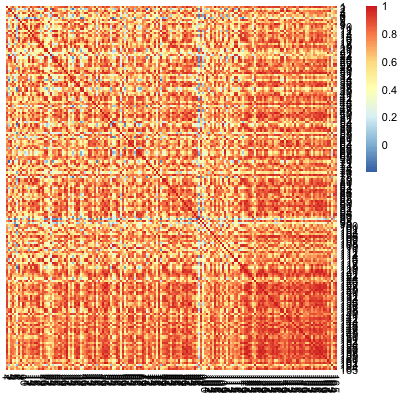

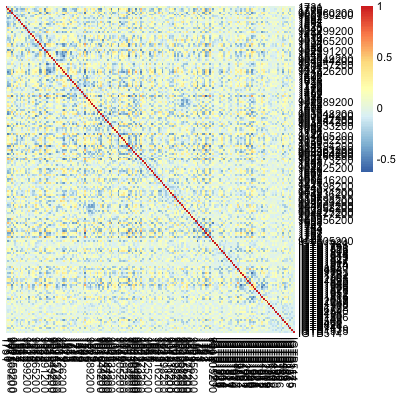

In [30]:
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, dc_prop))),cluster_rows=F,cluster_cols=F)
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(cbind(pbmc_expr_std)),cluster_rows=F,cluster_cols=F)

# Figure 2A - heatmap

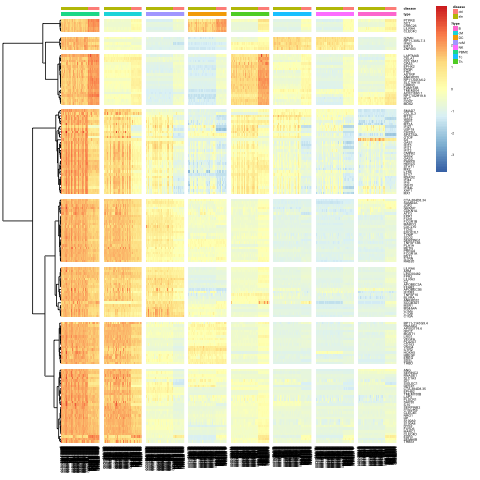

In [31]:
options(repr.plot.width = 6, repr.plot.height = 6)
pheatmap_out <- pheatmap(all_expr_sig,
         cluster_rows=T, cluster_cols=F, annotation_col = ct_annotation, #annotation_row = kmeans_annotation,
        gaps_col=seq(ncol(cm_expr),ncol(cm_expr)*length(cell_types),ncol(cm_expr)),cutree_rows=8, 
                         scale="row",fontsize=3,clustering_method="ward.D",clustering_distance_roww="manhattan")
options(repr.plot.width = 4, repr.plot.height = 4)

## More principled way to cut the tree and label the specific signatures

In [32]:
cuttree_out <- cutree(pheatmap_out$tree_row, k = 8)
cuttree_out[which(cuttree_out==4)] <- "dc_specific";
cuttree_out[which(cuttree_out==8)] <- "tc_specific";
cuttree_out[which(cuttree_out==1)] <- "th_specific";
cuttree_out[which(cuttree_out==6)] <- "all_ifn";
cuttree_out[which(cuttree_out==3)] <- "myeloid_ifn";
cuttree_out[which(cuttree_out==2)] <- "ncM_ifn";
cuttree_out[which(cuttree_out==7)] <- "cM_DC_ifn";
cuttree_out[which(cuttree_out==5)] <- "cM_ifn";

cuttree_gene_names <- names(cuttree_out);
cuttree_out <- cbind(cuttree_gene_names,cuttree_out)
colnames(cuttree_out) <- c("gene","cluster")
write.table(cuttree_out, file="diffexp.annotations.txt",sep="\t",col.names=T,row.names=F,quote=F);

# Figure 2B - correlogram to show coexpressed genes

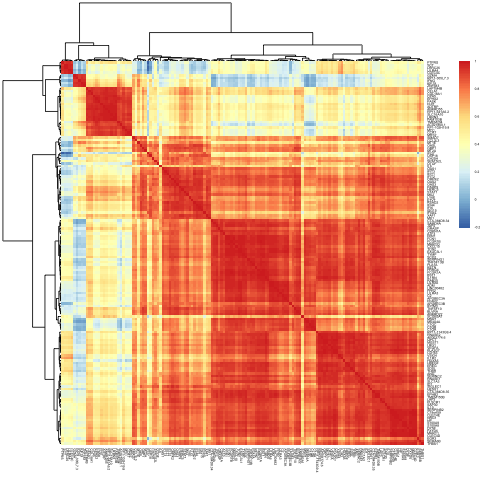

In [33]:
no_pbmc_cor <- cor(t(all_expr_sig[,-c(1,ncol(pbmc_expr))]))
options(repr.plot.width = 6, repr.plot.height = 6)
pheatmap(no_pbmc_cor,
         cluster_rows=pheatmap_out$tree_row, cluster_cols=pheatmap_out$tree_row, #annotation_row = kmeans_annotation,
         fontsize=3)
options(repr.plot.width = 4, repr.plot.height = 4)

# Figure 2C: Proportion of variance explained


First, we are going to estimate proportion of variance explained by cell type proportion

This will be a multiple regression

\begin{equation*}
e_i = -1 + b_1\times p_1 + b_2\times p_2 + ... + b_n\times p_n
\end{equation*}

Next, we are going to estimate proportion of variance explained by cell type specific expression

This will be a multiple regression


\begin{equation*}
e_i = -1 + b_1\times e_1 + b_2\times e_2 + ... + b_n\times e_n
\end{equation*}

calculate adjusted r_2 and also the cell type specific r2

Y_i = %mono*mono_i + %other*other_i + err
Or
Y_i = %mono*mono_i
log(Y_i) = log(%mono)+log(mono_i)+err


## Processing all - now, let's fit with -1 but we need to standardize the outcome

In [34]:
## including dc analysis
output_prop_noint <- NULL;

## -1 so that the ordering doesn't matter

for(i in 1:nrow(pbmc_expr_std)) {
    model <- lm(pbmc_expr_std[i,]~cm_prop+th_prop+b_prop+nk_prop+ncm_prop+tc_prop+dc_prop-1)
    ##model_anova <- anova(model)
    ##sum_sq <- model_anova$"Sum Sq"
    r2 = summary(model)$coef[,1]^2*apply(cbind(cm_prop,th_prop,b_prop,nk_prop,ncm_prop,tc_prop,dc_prop), 2,var,na.rm=T)/var(pbmc_expr_std[i,])*100;
    output_prop_noint <- rbind(output_prop_noint, 
                               c(r2,
                               sum(r2),
                               summary(model)$adj.r.squared*100))
}

rownames(output_prop_noint) <- expr_gene_names;
colnames(output_prop_noint) <- c("cM","Th","B","NK","ncM","Tc","DC","total r2","adj r2")

output_expr_noint <- NULL;

## -1 so that the ordering doesn't matter

for(i in 1:nrow(pbmc_expr_std)) {
    model <- lm(pbmc_expr_std[i,]~cm_expr_std[i,]+th_expr_std[i,]+b_expr_std[i,]+nk_expr_std[i,]+ncm_expr_std[i,]+tc_expr_std[i,]+dc_expr_std[i,]-1)
    
    r2 = summary(model)$coef[,1]^2*apply(cbind(cm_expr_std[i,],th_expr_std[i,],b_expr_std[i,],nk_expr_std[i,],ncm_expr_std[i,],tc_expr_std[i,],dc_expr_std[i,]), 2,var,na.rm=T)/var(pbmc_expr_std[i,])*100;
    
    output_expr_noint <- rbind(output_expr_noint, 
                               c(r2,
                               sum(r2),
                               summary(model)$adj.r.squared*100))
}

rownames(output_expr_noint) <- expr_gene_names;
colnames(output_expr_noint) <- c("cM","Th","B","NK","ncM","Tc","DC","total r2","adj r2")

## Processing SLE

### All of SLE

## flip how things are fit
## difference in likelihoods between model with T cells vs model without T cells

In [35]:
## including dc analysis
output_sle_prop_noint <- NULL;

## -1 so that the ordering doesn't matter

for(i in 1:nrow(pbmc_sle_expr_std)) {
    model <- lm(pbmc_sle_expr_std[i,]~cm_sle_prop+th_sle_prop+b_sle_prop+nk_sle_prop+ncm_sle_prop+tc_sle_prop+dc_sle_prop-1)
    ##model_anova <- anova(model)
    ##sum_sq <- model_anova$"Sum Sq"
    r2 = summary(model)$coef[,1]^2*apply(cbind(cm_sle_prop,th_sle_prop,b_sle_prop,nk_sle_prop,ncm_sle_prop,tc_sle_prop,dc_sle_prop), 2,var,na.rm=T)/var(pbmc_sle_expr_std[i,])*100;
    output_sle_prop_noint <- rbind(output_sle_prop_noint, 
                               c(r2,
                               sum(r2),
                               summary(model)$adj.r.squared*100))
}

rownames(output_sle_prop_noint) <- expr_gene_names;
colnames(output_sle_prop_noint) <- c("cM","Th","B","NK","ncM","Tc","DC","total r2","adj r2")

output_sle_expr_noint <- NULL;

## -1 so that the ordering doesn't matter

for(i in 1:nrow(pbmc_sle_expr_std)) {
    model <- lm(pbmc_sle_expr_std[i,]~cm_sle_expr_std[i,]+th_sle_expr_std[i,]+b_sle_expr_std[i,]+nk_sle_expr_std[i,]+ncm_sle_expr_std[i,]+tc_sle_expr_std[i,]+dc_sle_expr_std[i,]-1)
    
    r2 = summary(model)$coef[,1]^2*apply(cbind(cm_sle_expr_std[i,],th_sle_expr_std[i,],b_sle_expr_std[i,],nk_sle_expr_std[i,],ncm_sle_expr_std[i,],tc_sle_expr_std[i,],dc_sle_expr_std[i,]), 2,var,na.rm=T)/var(pbmc_sle_expr_std[i,])*100;
    
    output_sle_expr_noint <- rbind(output_sle_expr_noint, 
                               c(r2,
                               sum(r2),
                               summary(model)$adj.r.squared*100))
}

rownames(output_sle_expr_noint) <- expr_gene_names;
colnames(output_sle_expr_noint) <- c("cM","Th","B","NK","ncM","Tc","DC","total r2","adj r2")

[1] 0.52507

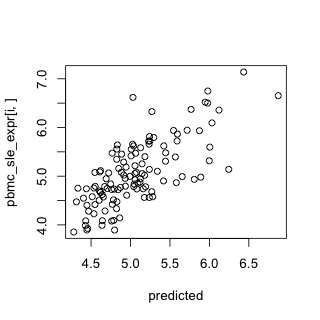

[1] 0.7499489

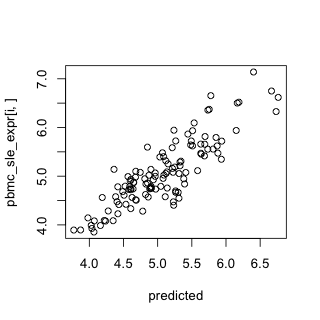

[1] 0.9417914

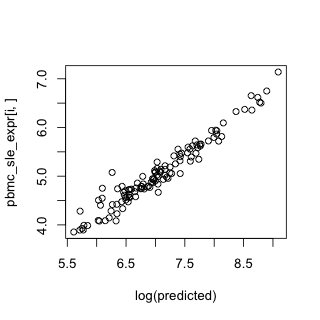

In [36]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=2
i=grep("^IL6$",expr_gene_names)[1]

model <- lm(pbmc_sle_expr[i,]~cm_sle_prop+th_sle_prop+b_sle_prop+nk_sle_prop+ncm_sle_prop+tc_sle_prop-1)
predicted <- model$fitted
plot(predicted, pbmc_sle_expr[i,])
cor(predicted, pbmc_sle_expr[i,])^2

model <- lm(pbmc_sle_expr[i,]~th_sle_expr[i,]+cm_sle_expr[i,]+b_sle_expr[i,]+nk_sle_expr[i,]+ncm_sle_expr[i,]+tc_sle_expr[i,]-1)
predicted <- model$fitted
plot(predicted, pbmc_sle_expr[i,])
cor(predicted, pbmc_sle_expr[i,])^2

predicted <- exp(th_sle_expr[i,])*th_sle_prop+exp(cm_sle_expr[i,])*cm_sle_prop+exp(b_sle_expr[i,])*b_sle_prop+
            exp(nk_sle_expr[i,])*nk_sle_prop+exp(ncm_sle_expr[i,])*ncm_sle_prop+exp(tc_sle_expr[i,])*tc_sle_prop
plot(log(predicted), pbmc_sle_expr[i,])
cor(log(predicted), pbmc_sle_expr[i,])^2


[1] 0.8831131

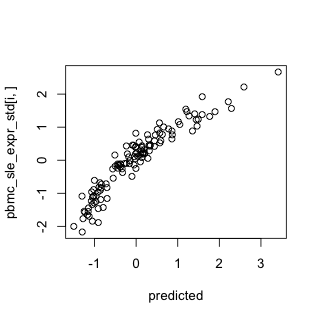

[1] 0.6196772

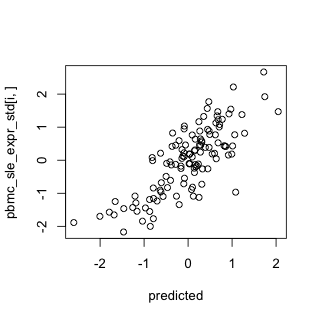

[1] 0.9400322

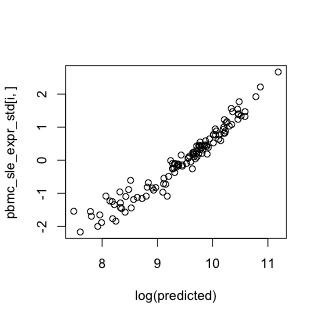

In [37]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=2
i=grep("^CD22$",expr_gene_names)[1]

model <- lm(pbmc_sle_expr_std[i,]~cm_sle_prop+th_sle_prop+b_sle_prop+nk_sle_prop+ncm_sle_prop+tc_sle_prop-1)
predicted <- model$fitted
plot(predicted, pbmc_sle_expr_std[i,])
cor(predicted, pbmc_sle_expr_std[i,])^2

model <- lm(pbmc_sle_expr_std[i,]~cm_sle_expr_std[i,]+th_sle_expr_std[i,]+b_sle_expr_std[i,]+nk_sle_expr_std[i,]+ncm_sle_expr_std[i,]
            +tc_sle_expr_std[i,]-1)
predicted <- model$fitted
plot(predicted, pbmc_sle_expr_std[i,])
cor(predicted, pbmc_sle_expr_std[i,])^2

predicted <- exp(th_sle_expr[i,])*th_sle_prop+exp(cm_sle_expr[i,])*cm_sle_prop+exp(b_sle_expr[i,])*b_sle_prop+
            exp(nk_sle_expr[i,])*nk_sle_prop+exp(ncm_sle_expr[i,])*ncm_sle_prop+exp(tc_sle_expr[i,])*tc_sle_prop
plot(log(predicted), pbmc_sle_expr_std[i,])
cor(log(predicted), pbmc_sle_expr_std[i,])^2


### Downsampled SLE to 46 samples

In [38]:
## including dc analysis
N <- 46;
samples <- sample(1:length(cm_sle_prop), N)

output_sle_down_prop_noint <- NULL;

## -1 so that the ordering doesn't matter

for(i in 1:nrow(pbmc_sle_expr_std)) {
    model <- lm(pbmc_sle_expr_std[i,samples]~cm_sle_prop[samples]+th_sle_prop[samples]+b_sle_prop[samples]+nk_sle_prop[samples]+ncm_sle_prop[samples]+tc_sle_prop[samples]+dc_sle_prop[samples]-1)
    ##model_anova <- anova(model)
    ##sum_sq <- model_anova$"Sum Sq"
    r2 = summary(model)$coef[,1]^2*apply(cbind(cm_sle_prop[samples],th_sle_prop[samples],b_sle_prop[samples],nk_sle_prop[samples],ncm_sle_prop[samples],tc_sle_prop[samples],dc_sle_prop[samples]), 2,var,na.rm=T)/var(pbmc_sle_expr_std[i,samples])*100;
    output_sle_down_prop_noint <- rbind(output_sle_down_prop_noint, 
                               c(r2,
                               sum(r2),
                               summary(model)$adj.r.squared*100))
}

rownames(output_sle_down_prop_noint) <- expr_gene_names;
colnames(output_sle_down_prop_noint) <- c("cM","Th","B","NK","ncM","Tc","DC","total r2","adj r2")

output_sle_down_expr_noint <- NULL;

## -1 so that the ordering doesn't matter

for(i in 1:nrow(pbmc_sle_expr_std)) {
    model <- lm(pbmc_sle_expr_std[i,samples]~cm_sle_expr_std[i,samples]+th_sle_expr_std[i,samples]+b_sle_expr_std[i,samples]+nk_sle_expr_std[i,samples]+ncm_sle_expr_std[i,samples]+tc_sle_expr_std[i,samples]+dc_sle_expr_std[i,samples]-1)
    
    r2 = summary(model)$coef[,1]^2*apply(cbind(cm_sle_expr_std[i,samples],th_sle_expr_std[i,samples],b_sle_expr_std[i,samples],nk_sle_expr_std[i,samples],ncm_sle_expr_std[i,samples],tc_sle_expr_std[i,samples],dc_sle_expr_std[i,samples]), 2,var,na.rm=T)/var(pbmc_sle_expr_std[i,samples])*100;
    
    output_sle_down_expr_noint <- rbind(output_sle_down_expr_noint, 
                               c(r2,
                               sum(r2),
                               summary(model)$adj.r.squared*100))
}

rownames(output_sle_down_expr_noint) <- expr_gene_names;
colnames(output_sle_down_expr_noint) <- c("cM","Th","B","NK","ncM","Tc","DC","total r2","adj r2")

## Processing healthy

In [39]:
## including dc analysis
output_healthy_prop_noint <- NULL;

## -1 so that the ordering doesn't matter

for(i in 1:nrow(pbmc_healthy_expr_std)) {
    model <- lm(pbmc_healthy_expr_std[i,]~cm_healthy_prop+th_healthy_prop+b_healthy_prop+nk_healthy_prop+ncm_healthy_prop+tc_healthy_prop+dc_healthy_prop-1)
    ##model_anova <- anova(model)
    ##sum_sq <- model_anova$"Sum Sq"
    r2 = summary(model)$coef[,1]^2*apply(cbind(cm_healthy_prop,th_healthy_prop,b_healthy_prop,nk_healthy_prop,ncm_healthy_prop,tc_healthy_prop,dc_healthy_prop), 2,var,na.rm=T)/var(pbmc_healthy_expr_std[i,])*100;
    output_healthy_prop_noint <- rbind(output_healthy_prop_noint, 
                               c(r2,
                               sum(r2),
                               summary(model)$adj.r.squared*100))
}

rownames(output_healthy_prop_noint) <- expr_gene_names;
colnames(output_healthy_prop_noint) <- c("cM","Th","B","NK","ncM","Tc","DC","total r2","adj r2")

output_healthy_expr_noint <- NULL;

## -1 so that the ordering doesn't matter

for(i in 1:nrow(pbmc_healthy_expr_std)) {
    model <- lm(pbmc_healthy_expr_std[i,]~cm_healthy_expr_std[i,]+th_healthy_expr_std[i,]+
                b_healthy_expr_std[i,]+nk_healthy_expr_std[i,]+ncm_healthy_expr_std[i,]+tc_healthy_expr_std[i,]+dc_healthy_expr_std[i,]-1)
    
    r2 = summary(model)$coef[,1]^2*apply(cbind(cm_healthy_expr_std[i,],th_healthy_expr_std[i,],b_healthy_expr_std[i,],nk_healthy_expr_std[i,],ncm_healthy_expr_std[i,],tc_healthy_expr_std[i,],dc_healthy_expr_std[i,]), 2,var,na.rm=T)/var(pbmc_healthy_expr_std[i,])*100;
    
    output_healthy_expr_noint <- rbind(output_healthy_expr_noint, 
                               c(r2,
                               sum(r2,na.rm=T),
                               summary(model)$adj.r.squared*100))
}

rownames(output_healthy_expr_noint) <- expr_gene_names;
colnames(output_healthy_expr_noint) <- c("cM","Th","B","NK","ncM","Tc","DC","total r2","adj r2")

Warning message in summary(model)$coef[, 1]^2 * apply(cbind(cm_healthy_expr_std[i, :
“longer object length is not a multiple of shorter object length”Warning message in summary(model)$coef[, 1]^2 * apply(cbind(cm_healthy_expr_std[i, :
“longer object length is not a multiple of shorter object length”Warning message in summary(model)$coef[, 1]^2 * apply(cbind(cm_healthy_expr_std[i, :
“longer object length is not a multiple of shorter object length”Warning message in summary(model)$coef[, 1]^2 * apply(cbind(cm_healthy_expr_std[i, :
“longer object length is not a multiple of shorter object length”Warning message in summary(model)$coef[, 1]^2 * apply(cbind(cm_healthy_expr_std[i, :
“longer object length is not a multiple of shorter object length”

## Summarize and plotting results

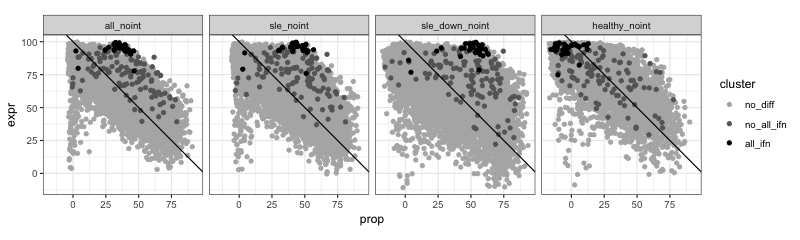

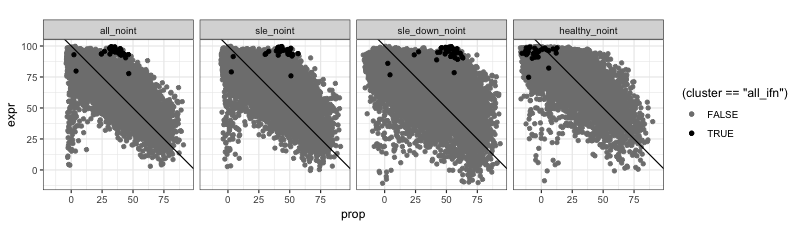

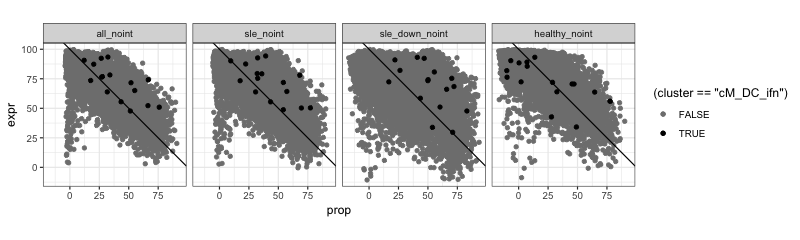

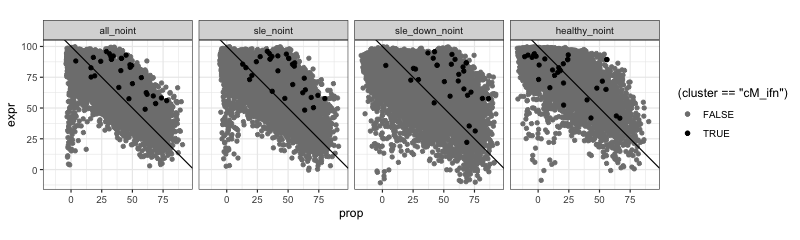

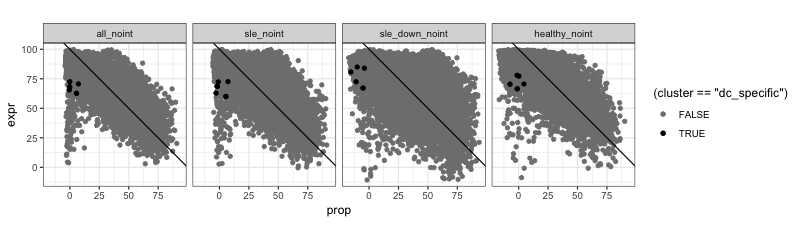

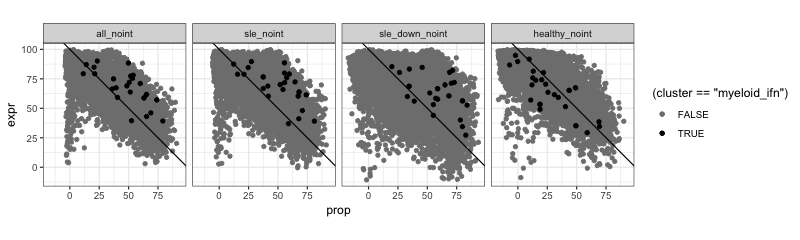

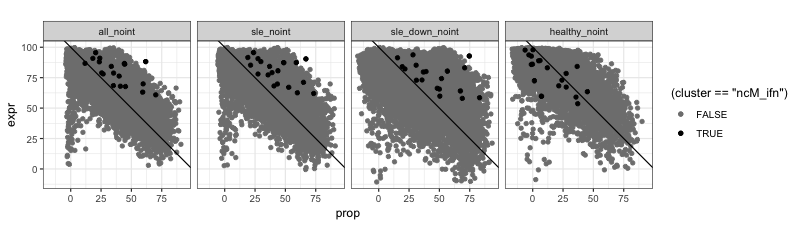

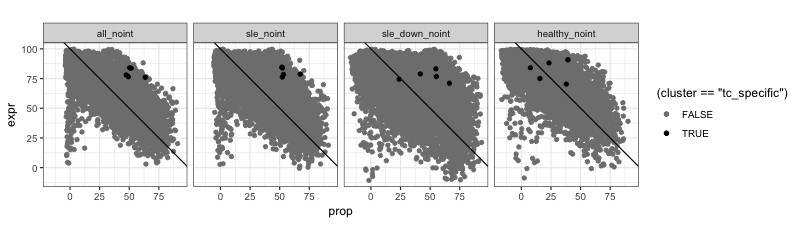

cor        prop_mean expr_mean sum_mean
all_noint      -0.7591694 24.61925  72.16172  96.78097
sle_noint      -0.7158317 26.39149  71.29493  97.68642
sle_down_noint -0.5944909 28.90651  68.70937  97.61588
healthy_noint  -0.6929161 15.66379  81.05340  96.71719

cM        Th        B        NK       ncM      Tc      
all_noint_prop       6.591895  3.603827 3.691199 1.593518 2.143269 1.998259
all_noint_expr      17.966246 14.540826 4.998053 3.582716 3.347980 5.649917
sle_noint_prop       6.565472  4.220205 4.180011 1.769411 2.365569 2.379810
sle_noint_expr      19.398465 13.034096 4.729852 3.554830 3.433715 5.899630
sle_down_noint_prop  7.793977  5.661143 5.418460 2.905992 3.683078 2.120368
sle_down_noint_expr 17.726450 14.093738 5.943889 4.139314 4.086777 6.018612
healthy_noint_prop   6.317894  3.282844 3.535246 3.553473 3.033576 2.033618
healthy_noint_expr  14.955112 25.049785 7.851389 4.649728 3.745158 5.783015
                    DC       total.r2 adj.r2  
all_noint_prop      1.348382 20.97035 24.61925
all_noint_expr      1.906411 51.99215 72.16172
sle_noint_prop      1.856630 23.33711 26.39149
sle_noint_expr      1.734586 51.78517 71.29493
sle_down_noint_prop 2.764167 30.34719 28.90651
sle_down_noint_expr 2.361249 54.37003 68.70937
healthy_noint_prop  2.682292 24.43894 15.66379
healthy_noint_expr  3.916366 65.95055 81.05340

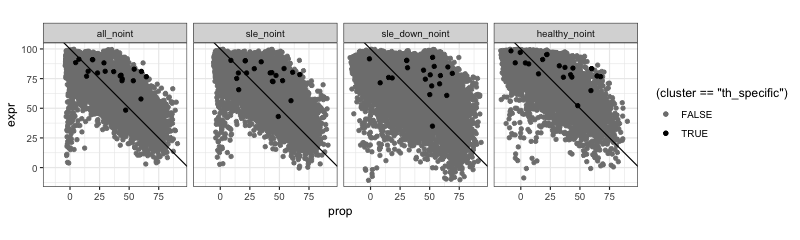

In [40]:
output_noint_df <- data.frame(prop=output_prop_noint[,"adj r2"], expr=output_expr_noint[,"adj r2"], type="all_noint")
output_noint_df$cluster <- "no_diff";
output_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_noint_df))] <- cuttree_out[,"cluster"];

output_sle_noint_df <- data.frame(prop=output_sle_prop_noint[,"adj r2"], expr=output_sle_expr_noint[,"adj r2"], type="sle_noint")
output_sle_noint_df$cluster <- "no_diff";
output_sle_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_noint_df))] <- cuttree_out[,"cluster"];

output_sle_down_noint_df <- data.frame(prop=output_sle_down_prop_noint[,"adj r2"], expr=output_sle_down_expr_noint[,"adj r2"], type="sle_down_noint")
output_sle_down_noint_df$cluster <- "no_diff";
output_sle_down_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_down_noint_df))] <- cuttree_out[,"cluster"];

output_healthy_noint_df <- data.frame(prop=output_healthy_prop_noint[,"adj r2"], expr=output_healthy_expr_noint[,"adj r2"], type="healthy_noint")
output_healthy_noint_df$cluster <- "no_diff";
output_healthy_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_healthy_noint_df))] <- cuttree_out[,"cluster"];

df <- rbind(output_noint_df, output_sle_noint_df, output_sle_down_noint_df, output_healthy_noint_df)
df$cluster <- as.factor(df$cluster)

options(repr.plot.width = 10, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff" & df_all_ifn$cluster != "all_ifn")] <- "no_all_ifn";
df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","no_all_ifn","all_ifn"));
df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]
ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)

ggplot(aes(prop, expr,color=(cluster=="all_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'all_ifn'),
             aes(x = prop, y = expr, color = (cluster=="all_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="cM_DC_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_DC_ifn'),
             aes(x = prop, y = expr, color = (cluster=="cM_DC_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="cM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_ifn'),
             aes(x = prop, y = expr, color = (cluster=="cM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="dc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'dc_specific'),
             aes(x = prop, y = expr, color = (cluster=="dc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="myeloid_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'myeloid_ifn'),
             aes(x = prop, y = expr, color = (cluster=="myeloid_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="ncM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'ncM_ifn'),
             aes(x = prop, y = expr, color = (cluster=="ncM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="tc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'tc_specific'),
             aes(x = prop, y = expr, color = (cluster=="tc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="th_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'th_specific'),
             aes(x = prop, y = expr, color = (cluster=="th_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)

df2 <- data.frame(cor=c(cor(output_prop_noint[,"adj r2"], output_expr_noint[,"adj r2"]), cor(output_sle_prop_noint[,"adj r2"], output_sle_expr_noint[,"adj r2"]), cor(output_sle_down_prop_noint[,"adj r2"], output_sle_down_expr_noint[,"adj r2"]), cor(output_healthy_prop_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])),
      prop_mean=c(mean(output_prop_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"])),
      expr_mean=c(mean(output_expr_noint[,"adj r2"]), mean(output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_expr_noint[,"adj r2"])),
      sum_mean = c(mean(output_prop_noint[,"adj r2"]+output_expr_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]+output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]+output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"]+output_healthy_expr_noint[,"adj r2"])))
rownames(df2) <- c("all_noint", "sle_noint", "sle_down_noint", "healthy_noint")

df2

df3 <- rbind(data.frame(t(apply(output_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_expr_noint,2,mean,na.rm=T))),
             data.frame(t(apply(output_sle_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_down_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_down_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_healthy_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_healthy_expr_noint,2,mean,na.rm=T))))

rownames(df3) <- c("all_noint_prop", "all_noint_expr", "sle_noint_prop", "sle_noint_expr", "sle_down_noint_prop", "sle_down_noint_expr", "healthy_noint_prop", "healthy_noint_expr")

df3

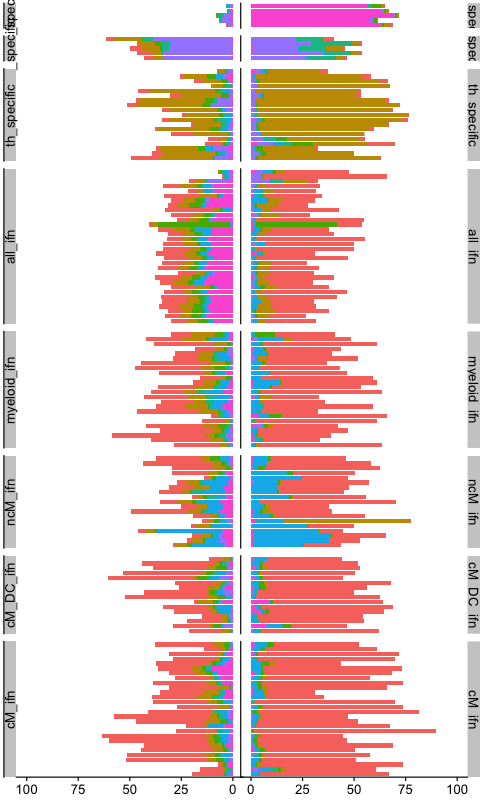

In [41]:
options(repr.plot.width = 6, repr.plot.height = 10)
out <- rbind(data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"DC"], cell="DC"))

##clusters_ordered <- factor(cuttree_out[,"cluster"], levels=c("dc_specific","tc_specific", "th_specific","all_ifn","myeloid_ifn","ncM_ifn","cM_DC_ifn","cM_ifn"))
##cuttree_ordered <- cuttree_out[order(clusters_ordered,decreasing=T),]
matched <- match(out$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out <- out[which(!is.na(matched)),]
out_ordered <- out[order(na.omit(matched)),]
out_ordered <- cbind(out_ordered, cluster=cuttree_out[match(out_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_ordered$cluster <- factor(out_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_ordered$gene_names <- factor(out_ordered$gene_names,levels=c(unique(as.character(out_ordered$gene_names))))
prop_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_ordered)+geom_bar(stat="identity")+theme(axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        axis.text.y = element_blank(), 
        ##axis.text.y = element_text(size=5),
        axis.ticks.y = element_blank(), 
        plot.margin = unit(c(1,-1,1,0), "mm"),
        legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y",switch="y")+scale_y_reverse(limits=c(100,0))+coord_flip()

options(repr.plot.width = 6, repr.plot.height = 10)
out_expr <- rbind(data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"DC"], cell="DC"))
##cuttree_ordered <- cuttree_out[order(cuttree_out[,"cluster"]),]
matched_expr <- match(out_expr$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_expr <- out_expr[which(!is.na(matched)),]
out_expr_ordered <- out_expr[order(na.omit(matched)),]
out_expr_ordered <- cbind(out_expr_ordered, cluster=cuttree_out[match(out_expr_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_expr_ordered$cluster <- factor(out_expr_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_expr_ordered$gene_names <- factor(out_expr_ordered$gene_names,levels=c(unique(as.character(out_expr_ordered$gene_names))))
expr_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_expr_ordered)+geom_bar(stat="identity")+ylim(0,100)+theme(axis.title.x = element_blank(), axis.title.y = element_blank(), 
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        plot.margin = unit(c(1,0,1,-1), "mm"),legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y")+coord_flip()

library(gridExtra)
gg1 <- ggplot_gtable(ggplot_build(prop_plot))
gg2 <- ggplot_gtable(ggplot_build(expr_plot))

grid.arrange(gg1,gg2,ncol=2,widths=c(4/9,4/9))


##ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_ordered)+geom_bar(stat="identity")+facet_grid(~cluster,scales = "free_x", space = "free_x")

Warning message:
“Removed 1 rows containing missing values (position_stack).”

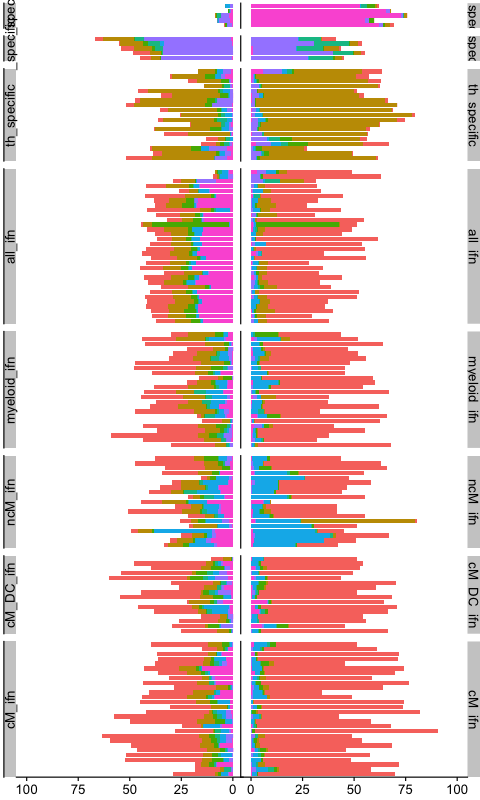

In [42]:
options(repr.plot.width = 6, repr.plot.height = 10)
out_sle_prop <- rbind(data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"DC"], cell="DC"))

##cuttree_ordered <- cuttree_out[order(cuttree_out[,"cluster"]),]
##matched <- match(out_sle_prop$gene_names, rownames(cuttree_ordered))

matched <- match(out_sle_prop$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_sle_prop <- out_sle_prop[which(!is.na(matched)),]
out_sle_prop_ordered <- out_sle_prop[order(na.omit(matched)),]
out_sle_prop_ordered <- cbind(out_sle_prop_ordered, cluster=cuttree_out[match(out_sle_prop_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_sle_prop_ordered$cluster <- factor(out_sle_prop_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_sle_prop_ordered$gene_names <- factor(out_sle_prop_ordered$gene_names,levels=c(unique(as.character(out_sle_prop_ordered$gene_names))))
sle_prop_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_sle_prop_ordered)+geom_bar(stat="identity")+theme(axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        plot.margin = unit(c(1,-1,1,0), "mm"),
        legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y",switch="y")+scale_y_reverse(limits=c(100,0))+coord_flip()


options(repr.plot.width = 6, repr.plot.height = 10)
out_sle_expr <- rbind(data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"DC"], cell="DC"))
##cuttree_ordered <- cuttree_out[order(cuttree_out[,"cluster"]),]

matched_expr <- match(out_sle_expr$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_sle_expr <- out_sle_expr[which(!is.na(matched)),]
out_sle_expr_ordered <- out_sle_expr[order(na.omit(matched)),]
out_sle_expr_ordered <- cbind(out_sle_expr_ordered, cluster=cuttree_out[match(out_sle_expr_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_sle_expr_ordered$cluster <- factor(out_sle_expr_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_sle_expr_ordered$gene_names <- factor(out_sle_expr_ordered$gene_names,levels=c(unique(as.character(out_sle_expr_ordered$gene_names))))
sle_expr_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_sle_expr_ordered)+geom_bar(stat="identity")+ylim(0,100)+coord_flip()+theme(axis.title.x = element_blank(), axis.title.y = element_blank(), 
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        plot.margin = unit(c(1,0,1,-1), "mm"),legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y")

library(gridExtra)
gg1 <- ggplot_gtable(ggplot_build(sle_prop_plot))
gg2 <- ggplot_gtable(ggplot_build(sle_expr_plot))

grid.arrange(gg1,gg2,ncol=2,widths=c(4/9,4/9))

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

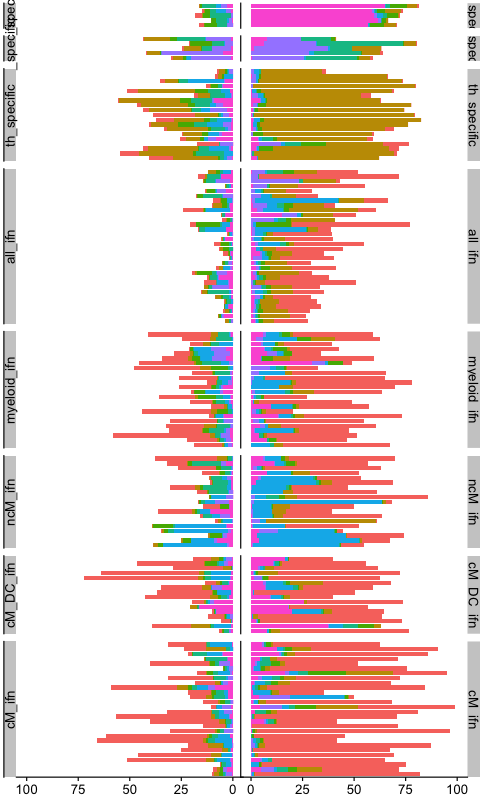

In [43]:
options(repr.plot.width = 6, repr.plot.height = 10)
out_healthy_prop <- rbind(data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"DC"], cell="DC"))

matched <- match(out_healthy_prop$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_healthy_prop <- out_healthy_prop[which(!is.na(matched)),]
out_healthy_prop_ordered <- out_healthy_prop[order(na.omit(matched)),]
out_healthy_prop_ordered <- cbind(out_healthy_prop_ordered, cluster=cuttree_out[match(out_healthy_prop_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_healthy_prop_ordered$cluster <- factor(out_healthy_prop_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_healthy_prop_ordered$gene_names <- factor(out_healthy_prop_ordered$gene_names,levels=c(unique(as.character(out_healthy_prop_ordered$gene_names))))
healthy_prop_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_healthy_prop_ordered)+geom_bar(stat="identity")+theme(axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        plot.margin = unit(c(1,-1,1,0), "mm"),
        legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y",switch="y")+scale_y_reverse(limits=c(100,0))+coord_flip()

options(repr.plot.width = 6, repr.plot.height = 10)
out_healthy_expr <- rbind(data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"DC"], cell="DC"))
##cuttree_ordered <- cuttree_out[order(cuttree_out[,"cluster"]),]
matched_expr <- match(out_healthy_expr$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_healthy_expr <- out_healthy_expr[which(!is.na(matched)),]
out_healthy_expr_ordered <- out_healthy_expr[order(na.omit(matched)),]
out_healthy_expr_ordered <- cbind(out_healthy_expr_ordered, cluster=cuttree_out[match(out_healthy_expr_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_healthy_expr_ordered$cluster <- factor(out_healthy_expr_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_healthy_expr_ordered$gene_names <- factor(out_healthy_expr_ordered$gene_names,levels=c(unique(as.character(out_healthy_expr_ordered$gene_names))))
healthy_expr_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_healthy_expr_ordered)+geom_bar(stat="identity")+ylim(0,100)+coord_flip()+theme(axis.title.x = element_blank(), axis.title.y = element_blank(), 
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        plot.margin = unit(c(1,0,1,-1), "mm"),legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y")

library(gridExtra)
gg1 <- ggplot_gtable(ggplot_build(healthy_prop_plot))
gg2 <- ggplot_gtable(ggplot_build(healthy_expr_plot))

grid.arrange(gg1,gg2,ncol=2,widths=c(4/9,4/9))

In [44]:
c(unique(as.character(out_ordered$gene_names)))

[1] "THBS1"         "SEMA6B"        "EGR3"          "CLEC4D"       
  [5] "MARC1"         "FXYD6"         "DYSF"          "S100A8"       
  [9] "S100A9"        "HP"            "NRG1"          "CLEC4E"       
 [13] "C19orf59"      "SERPINB2"      "IL10"          "SAP30"        
 [17] "PLSCR1"        "LAP3"          "TMEM150B"      "EPHB2"        
 [21] "CTA-384D8.35"  "HESX1"         "SIGLEC1"       "ID1"          
 [25] "SLC1A3"        "RNASE1"        "SERINC2"       "ANG"          
 [29] "THBD"          "SDSL"          "EREG"          "HBEGF"        
 [33] "HOXA5"         "IL1R2"         "VSIG4"         "CD163"        
 [37] "PLA2G7"        "VEGFA"         "LRG1"          "MGST1"        
 [41] "QPCT"          "AP003774.6"    "RNASE2"        "RP11-1143G9.4"
 [45] "C1QA"          "C1QB"          "C1QC"          "MS4A4A"       
 [49] "MSR1"          "SCGB3A1"       "ANKRD22"       "BLVRA"        
 [53] "TNFSF10"       "IFITM3"        "APOBEC3B"      "FFAR2"        
 [57] "APOBEC3A"      "C2"            "LILRA3"        "FPR2"         
 [61] "LINC00482"     "ADM"           "LILRA6"        "RAB20"        
 [65] "IL1RN"         "BST1"          "FCGR1A"        "PRRG4"        
 [69] "RETN"          "PLA1A"         "TNFSF13B"      "SERPING1"     
 [73] "SCO2"          "TYMP"          "EXOC3L1"       "TCN2"         
 [77] "CXCL10"        "MARCO"         "FCGR1B"        "FCN1"         
 [81] "FPR1"          "ATF3"          "CDKN1A"        "GRASP"        
 [85] "JDP2"          "SAMD4A"        "CTA-384D8.34"  "MX1"          
 [89] "XAF1"          "IFI44L"        "ISG15"         "IFI6"         
 [93] "IFI44"         "RSAD2"         "ETV7"          "LY6E"         
 [97] "MX2"           "STAT1"         "HERC5"         "PARP9"        
[101] "OAS3"          "OAS2"          "CMPK2"         "IFIT2"        
[105] "IFIT1"         "IFIT3"         "OAS1"          "IL6"          
[109] "OTOF"          "SPATS2L"       "CH25H"         "USP18"        
[113] "IFI27"         "MT2A"          "GBP1"          "OASL"         
[117] "MT1E"          "CCL3L3"        "SMAD7"         "MDS2"         
[121] "CCR7"          "MYC"           "RP1-102H19.8"  "AC021860.1"   
[125] "TMEM204"       "FAM153B"       "LRRN3"         "SLC16A10"     
[129] "RP11-641A6.2"  "ANKRD55"       "ADTRP"         "FHIT"         
[133] "PASK"          "EPHX2"         "CPA5"          "COL18A1"      
[137] "CELA1"         "LAPTM4B"       "ZNF683"        "KIF19"        
[141] "IFNG"          "RP11-305L7.3"  "GZMH"          "CLEC4C"       
[145] "LILRA4"        "LRRC26"        "SCT"           "PTPRS"

In [45]:
r2 <- cbind(output_sle_down_prop_noint[,"adj r2"],output_healthy_prop_noint[,"adj r2"])
r2[order(apply(r2,1,mean),decreasing=T),]

[,1]       [,2]      
CD3E          93.49156   86.24032  
PAX5          92.37250   85.72733  
CD79A         86.78879   90.10847  
RALGPS2       90.97982   85.68996  
EBF1          92.45161   79.02139  
CD3D          83.12446   86.11750  
S100A6        85.66728   83.40819  
TYROBP        87.40907   81.62564  
STRBP         91.65563   77.19763  
GNG7          91.05745   77.33179  
BANK1         85.78178   82.01867  
CD22          89.64004   78.13379  
C4orf48       88.71754   78.64577  
PGD           89.83800   77.49980  
CD19          89.52569   77.36414  
CST3          84.21591   82.30591  
AP2S1         90.68229   75.36520  
LST1          81.44928   84.47107  
FAM129C       90.40495   75.35765  
MS4A1         84.73094   80.60993  
AFF3          88.96065   76.36635  
OAZ1          85.61495   79.64776  
CTSS          82.84510   82.41182  
VCAN          85.97397   79.16201  
CD37          89.81386   75.09431  
S100A4        84.22988   80.41680  
TPD52         84.17181   80.23597  
TIMP2         84.17500   80.09202  
CD3G          80.63834   83.47768  
RNF130        83.62790   80.21246  
⋮             ⋮          ⋮         
RBM10         -10.944555 -10.361675
IREB2         -15.428899  -6.045425
FTO           -10.714902 -10.821061
METAP1         -8.460461 -13.371223
CCNT1         -14.240122  -7.687975
SLC25A51      -11.835437 -10.157689
ELP5           -6.683408 -15.337515
DLD            -8.694584 -13.338879
FAM189B        -7.405825 -14.725180
RP11-294J22.6  -8.813508 -13.570600
PSKH1          -8.371650 -14.235437
C19orf52       -9.732437 -13.040202
RNASEL         -8.994701 -13.788971
KIAA1468      -15.780990  -7.039533
CLPX          -14.361510  -8.589866
FH            -15.893199  -7.059246
ANXA3          -6.447037 -16.508654
FER           -12.488898 -10.497393
ZMYM3         -10.358841 -12.671445
MRPL35        -14.262993  -8.805160
NFYC-AS1      -12.353976 -11.036016
RAB3A         -10.020548 -13.389734
MIR29A        -12.823319 -11.728752
SULF2         -13.362893 -11.255122
SMC5          -13.516334 -11.166985
NUP85         -10.515237 -15.635879
ATG2B         -12.102099 -14.049247
SLC25A35      -14.375197 -13.327964
CHAMP1        -12.946953 -15.992695
MPV17L2       -17.316626 -13.615635

In [46]:
r2 <- cbind(output_sle_down_expr_noint[,"adj r2"],output_healthy_expr_noint[,"adj r2"])
r2[order(apply(r2,1,mean),decreasing=T),]

[,1]         [,2]      
RP1-3J17.3    99.57592     99.62359  
RPS26         99.02788     99.26192  
IFI44L        99.47486     98.80117  
XAF1          98.93668     98.98873  
EIF2AK2       99.55055     98.33087  
SLC2A14       98.70966     98.82105  
HLA-DQA2      98.21125     99.28647  
EIF5A         97.87714     99.50234  
FAM118A       97.55322     99.60952  
RBM3          98.42622     98.66609  
RP11-262H14.3 97.53064     99.53592  
NUDT2         98.37529     98.64841  
LINC00339     97.91589     99.09274  
C17orf97      98.23465     98.66796  
ERAP2         98.06459     98.80980  
MX1           98.52354     98.29940  
KANSL1-AS1    98.01238     98.81002  
GSTT1         97.62415     98.97850  
UTS2          98.35849     98.13970  
AL592183.1    97.18639     99.30080  
MTRNR2L1      97.39923     98.92747  
CCZ1B         97.58449     98.74048  
YBEY          97.86900     98.45430  
HLA-DRB5      97.87607     98.36521  
ELP5          97.49023     98.66922  
LINC00969     97.36734     98.74834  
HERC5         97.72118     98.22333  
RP11-347P5.1  96.57222     99.34830  
EIF1          96.81623     99.03332  
SNHG15        97.47954     98.30170  
⋮             ⋮            ⋮         
RAB32          -2.81335123 29.6127270
ZNF385A         2.61103699 23.3670675
PNOC           23.51751469  2.3023008
LILRB2         23.61245052  1.4484942
C19orf38        9.32588785 15.3810702
PLXDC2          3.95044934 19.7927486
EMILIN2         4.11477500 19.3191475
PRAM1          -0.01710327 23.1771094
BID            10.58132423 12.0917658
HIST1H2BJ      14.50395566  7.9706840
CMTM5          15.22327163  5.6282723
RXRA           -4.89386193 23.9686005
CPNE5           5.75732797 12.6138803
TYROBP          4.31555332 12.7580274
FGR             8.82200959  8.1859134
GNG7            5.58015931 11.3783176
EHBP1L1         5.67391150 11.2697284
CLEC7A        -10.23629648 27.0993237
LYN            -0.08181077 16.6674260
LRRC25          4.79576289  8.7833418
SIRPA          10.52371639 -0.7704561
TMEM40        -10.71774213 17.4191540
SPI1            3.47360325  2.0283563
CLEC1B         -7.47122340 11.5138269
SH3BP2         -1.66014781  5.0202407
SLC15A3        -8.23707498 11.3999223
GP9            10.22860895 -8.7346626
HCK            -3.89777387  3.1153384
ACRBP          -5.21061754 -0.7813067
DMXL2          -7.63066311  0.5725082

In [47]:
r2.rat <- cbind(output_sle_down_prop_noint[,"total r2"]/(output_sle_down_expr_noint[,"total r2"]+output_sle_down_prop_noint[,"total r2"]),
                output_healthy_prop_noint[,"total r2"]/(output_healthy_expr_noint[,"total r2"]+output_healthy_prop_noint[,"total r2"]))
r2.rat["NKG7",]

[1] 0.7012964 0.6764370

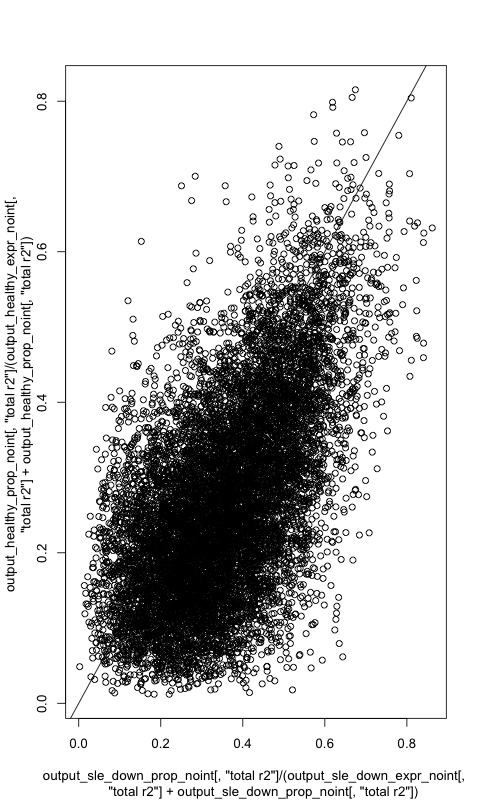

In [48]:
## look for cell type proportion genes
plot(output_sle_down_prop_noint[,"total r2"]/(output_sle_down_expr_noint[,"total r2"]+output_sle_down_prop_noint[,"total r2"]),
output_healthy_prop_noint[,"total r2"]/(output_healthy_expr_noint[,"total r2"]+output_healthy_prop_noint[,"total r2"]))
abline(a=0,b=1)


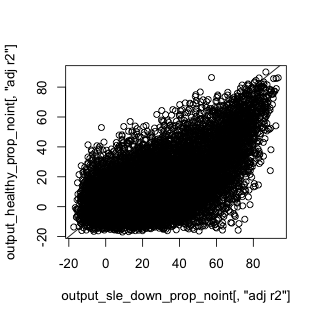

In [49]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_prop_noint[,"adj r2"], output_healthy_prop_noint[,"adj r2"])
abline(b=1,a=0)

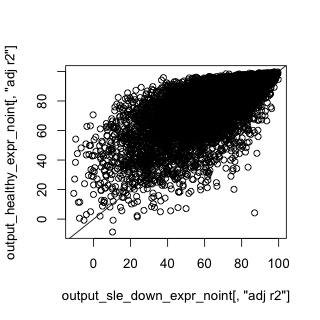

In [50]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_expr_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])
abline(b=1,a=0)

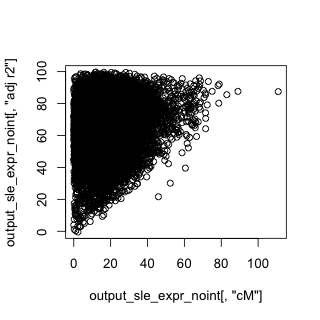

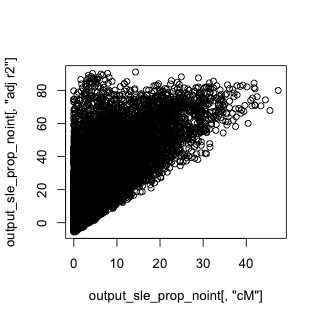

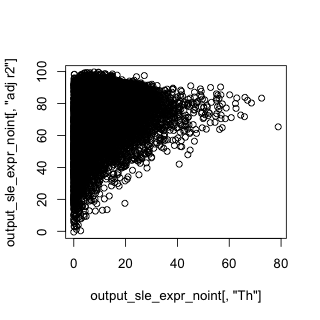

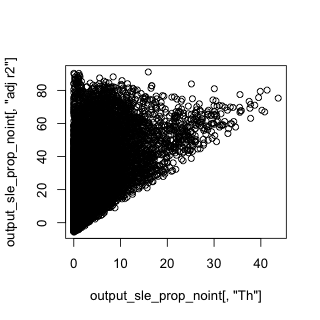

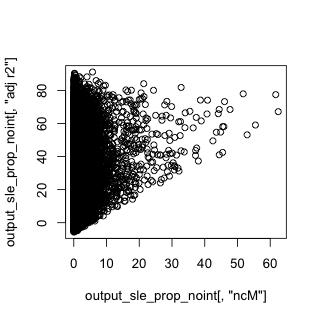

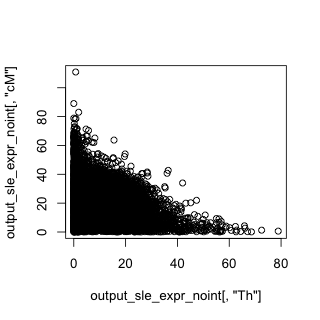

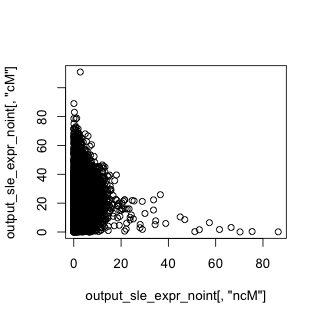

In [51]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_expr_noint[,"cM"], output_sle_expr_noint[,"adj r2"])
plot(output_sle_prop_noint[,"cM"], output_sle_prop_noint[,"adj r2"])
plot(output_sle_expr_noint[,"Th"], output_sle_expr_noint[,"adj r2"])
plot(output_sle_prop_noint[,"Th"], output_sle_prop_noint[,"adj r2"])
plot(output_sle_prop_noint[,"ncM"], output_sle_prop_noint[,"adj r2"])
plot(output_sle_expr_noint[,"Th"], output_sle_expr_noint[,"cM"])
plot(output_sle_expr_noint[,"ncM"], output_sle_expr_noint[,"cM"])


# Let's do the estimation using resampling

We are going to work with counts here. Given the expression of an arbitrary gene $i$ and individual $j$ in PBMCs $P$, and two cell types (B and T) for simplicity. $N_j^B$ and $N_j^T$ are the number of B cells and T cells for individual $j$.

\begin{align*}
P_{ij} &= B_{ij1}+B_{ij2}+...+B_{ijN_b}+T_{ij1}+T_{ij2}+...+T_{ijN_t} \\
P_{ij} &= \sum_k^{N_j^B}B_{ijk} + \sum_k^{N_j^T}T_{ijk} \\
P_{ij} &= N_j^B\times{\bar{B}_{ij}} + N_j^T\times{\bar{T}_{ij}} \\
\bar{P_{ij}} &= {{N_j^B}\over{N_j^{PBMC}}}\times{\bar{B_{ij}}} + {{N_j^T}\over{N_j^{PBMC}}}\times{\bar{T_{ij}}} \\
\bar{P_{ij}} &= {{{\rho}_j^B}\times{\bar{B_{ij}}} + {{\rho}_j^T}\times{\bar{T_{ij}}}}
\end{align*}


$\bar{B}_{ij}$ is the average expression of the gene $i$ in individual $j$ in cell type B. $\bar{T}_{ij}$ is the average expression of the gene $i$ in individual $j$ in cell type T

First, fit proportion

\begin{align*}
\bar{P_{ij}} &= {{\rho}_j^B}\times{\bar{B_{i}}} + {{\rho}_j^T}\times{\bar{T_{i}}}
\end{align*}

When we fit, we will take the average of expression over all individuals. That is $\bar{B_{i}} = {{\sum_j^{J}\bar{B_{ij}}}\over{J}}$

Second, fit expression

\begin{align*}
\bar{P_{ij}} &= {\bar{{\rho}^B}}\times{B_{ij}} + {\bar{{\rho}^T}}\times{T_{ij}}
\end{align*}

When we fit, we will take the average of expression over all individuals. That is $\bar{{\rho}^B} = {{{\sum_j^{J}{\rho_j^B}}}\over{J}}$


## First, let's do all individuals

In [52]:
##joined_pivot_filtered <- joined_pivot[match(colnames(pbmc_expr),joined_pivot$ind_cov),]
# cm_counts_mean <- sweep(exp(cm_expr), 2, joined_pivot_filtered$counts*cm_prop/100, "/")
# th_counts_mean <- sweep(exp(th_expr), 2, joined_pivot_filtered$counts*th_prop/100, "/")
# tc_counts_mean <- sweep(exp(tc_expr), 2, joined_pivot_filtered$counts*tc_prop/100, "/")
# b_counts_mean <- sweep(exp(b_expr), 2, joined_pivot_filtered$counts*b_prop/100, "/")
# nk_counts_mean <- sweep(exp(nk_expr), 2, joined_pivot_filtered$counts*nk_prop/100, "/")
# ncm_counts_mean <- sweep(exp(ncm_expr), 2, joined_pivot_filtered$counts*ncm_prop/100, "/")
# dc_counts_mean <- sweep(exp(dc_expr), 2, joined_pivot_filtered$counts*dc_prop/100, "/")
# pbmc_counts_mean <- sweep(exp(pbmc_expr), 2, joined_pivot_filtered$counts, "/")

cm_counts_mean <- exp(cm_expr)
th_counts_mean <- exp(th_expr)
tc_counts_mean <- exp(tc_expr)
b_counts_mean <- exp(b_expr)
nk_counts_mean <- exp(nk_expr)
ncm_counts_mean <- exp(ncm_expr)
dc_counts_mean <- exp(dc_expr)
pbmc_counts_mean <- exp(pbmc_expr)


## some samples do not have b cells or dcs, let's set those means to 0
b_counts_mean[is.nan(b_counts_mean)] <- 0;
dc_counts_mean[is.nan(dc_counts_mean)] <- 0;
b_counts_mean[!is.finite(b_counts_mean)] <- 0;
dc_counts_mean[!is.finite(dc_counts_mean)] <- 0;

# cm_counts_global_mean <- rowSums(exp(cm_expr))/sum(joined_pivot_filtered$counts*cm_prop/100, na.rm=T)
# th_counts_global_mean <- rowSums(exp(th_expr))/sum(joined_pivot_filtered$counts*th_prop/100, na.rm=T)
# tc_counts_global_mean <- rowSums(exp(tc_expr))/sum(joined_pivot_filtered$counts*tc_prop/100, na.rm=T)
# b_counts_global_mean <- rowSums(exp(b_expr))/sum(joined_pivot_filtered$counts*b_prop/100, na.rm=T)
# nk_counts_global_mean <- rowSums(exp(nk_expr))/sum(joined_pivot_filtered$counts*nk_prop/100, na.rm=T)
# ncm_counts_global_mean <- rowSums(exp(ncm_expr))/sum(joined_pivot_filtered$counts*ncm_prop/100, na.rm=T)
# dc_counts_global_mean <- rowSums(exp(dc_expr))/sum(joined_pivot_filtered$counts*dc_prop/100, na.rm=T)

cm_counts_global_mean <- apply(exp(cm_expr),1,mean)
th_counts_global_mean <- apply(exp(th_expr),1,mean)
tc_counts_global_mean <- apply(exp(tc_expr),1,mean)
b_counts_global_mean <- apply(exp(b_expr),1,mean)
nk_counts_global_mean <- apply(exp(nk_expr),1,mean)
ncm_counts_global_mean <- apply(exp(ncm_expr),1,mean)
dc_counts_global_mean <- apply(exp(dc_expr),1,mean)


a <- cbind(cm_counts_global_mean, th_counts_global_mean, tc_counts_global_mean, b_counts_global_mean, nk_counts_global_mean, ncm_counts_global_mean, dc_counts_global_mean)
##sle_counts_means <- cbind(cm_sle_counts_mean, th_sle_counts_mean, tc_sle_counts_mean, b_sle_counts_mean, nk_sle_counts_mean, ncm_sle_counts_mean, dc_sle_counts_mean)

output_direct_global_prop <- NULL;

for(i in 1:nrow(pbmc_counts[match(expr_gene_names, counts_gene_names),])) {    
    predicted <- rowSums(cbind(cm_counts_global_mean[i]*cm_prop/100,
                               th_counts_global_mean[i]*th_prop/100, 
                               b_counts_global_mean[i]*b_prop/100, 
                               nk_counts_global_mean[i]*nk_prop/100, 
                               ncm_counts_global_mean[i]*ncm_prop/100, 
                               tc_counts_global_mean[i]*tc_prop/100,##), na.rm=T)
                               dc_counts_global_mean[i]*dc_prop/100), na.rm=T)

    output_direct_global_prop <- rbind(output_direct_global_prop, c(cor(log(predicted),pbmc_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_expr_std[i,])^2*100))
}


rownames(output_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
colnames(output_direct_global_prop) <- c("r2", "res")

output_direct_global_expr <- NULL;

cm_prop_global_mean <- sum(joined_pivot_filtered$counts*cm_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
th_prop_global_mean <- sum(joined_pivot_filtered$counts*th_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
tc_prop_global_mean <- sum(joined_pivot_filtered$counts*tc_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
b_prop_global_mean <- sum(joined_pivot_filtered$counts*b_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
nk_prop_global_mean <- sum(joined_pivot_filtered$counts*nk_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
ncm_prop_global_mean <- sum(joined_pivot_filtered$counts*ncm_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
dc_prop_global_mean <- sum(joined_pivot_filtered$counts*dc_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)

a_prop <- c(cm_prop_global_mean, th_prop_global_mean, tc_prop_global_mean, b_prop_global_mean, nk_prop_global_mean, ncm_prop_global_mean, dc_prop_global_mean);

for(i in 1:nrow(pbmc_counts[match(expr_gene_names, counts_gene_names),])) {
   predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop_global_mean, 
                              th_counts_mean[i,]*th_prop_global_mean, 
                              b_counts_mean[i,]*b_prop_global_mean,
                              nk_counts_mean[i,]*nk_prop_global_mean, 
                               ncm_counts_mean[i,]*ncm_prop_global_mean,
                              tc_counts_mean[i,]*tc_prop_global_mean,##), na.rm=T)
                              dc_counts_mean[i,]*dc_prop_global_mean), na.rm=T)

    output_direct_global_expr <- rbind(output_direct_global_expr, c(cor(log(predicted),pbmc_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_expr_std[i,])^2*100))
}

rownames(output_direct_global_expr) <- expr_gene_names;
colnames(output_direct_global_expr) <- c("r2", "res")

Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”

[1] 0.8852538

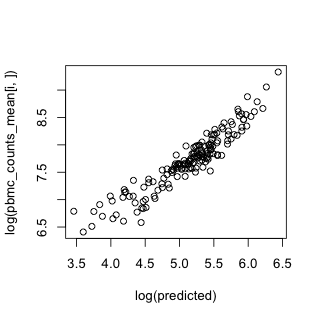

[1] 0.4242958

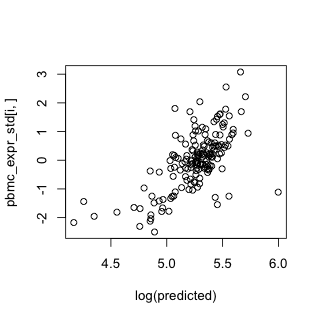

[1] 0.9350822

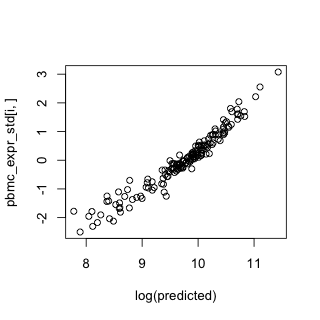

In [53]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=10
i=grep("^CD22$",expr_gene_names)[1]
##i=grep("ERAP2",expr_gene_names)[1]
predicted <- rowSums(cbind(cm_counts_global_mean[i]*cm_prop/100,
                               th_counts_global_mean[i]*th_prop/100,
                               b_counts_global_mean[i]*b_prop/100,
                               nk_counts_global_mean[i]*nk_prop/100, 
                               ncm_counts_global_mean[i]*ncm_prop/100,
                               tc_counts_global_mean[i]*tc_prop/100,
                     dc_counts_global_mean[i]*dc_prop/100),na.rm=T)
plot(log(predicted), log(pbmc_counts_mean[i,]))
cor(log(predicted), pbmc_expr_std[i,])^2

predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop_global_mean, 
                              th_counts_mean[i,]*th_prop_global_mean, 
                              b_counts_mean[i,]*b_prop_global_mean,
                              nk_counts_mean[i,]*nk_prop_global_mean, 
                               ncm_counts_mean[i,]*ncm_prop_global_mean,
                              tc_counts_mean[i,]*tc_prop_global_mean,
                          dc_counts_mean[i,]*dc_prop_global_mean), na.rm=T)
plot(log(predicted), pbmc_expr_std[i,])
cor(log(predicted), pbmc_expr_std[i,])^2


predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop, 
                              th_counts_mean[i,]*th_prop, 
                              b_counts_mean[i,]*b_prop,
                              nk_counts_mean[i,]*nk_prop, 
                               ncm_counts_mean[i,]*ncm_prop,
                              tc_counts_mean[i,]*tc_prop,
                          dc_counts_mean[i,]*dc_prop), na.rm=T)
plot(log(predicted), pbmc_expr_std[i,])
cor(log(predicted), pbmc_expr_std[i,])^2

## Second, let's do SLE

Mean of means might be a bit unstable, let's calculate a global mean

### All SLE

In [54]:
# cm_sle_counts_mean <- sweep(exp(cm_sle_expr), 2, joined_pivot_sle$counts*cm_sle_prop/100, "/")
# th_sle_counts_mean <- sweep(exp(th_sle_expr), 2, joined_pivot_sle$counts*th_sle_prop/100, "/")
# tc_sle_counts_mean <- sweep(exp(tc_sle_expr), 2, joined_pivot_sle$counts*tc_sle_prop/100, "/")
# b_sle_counts_mean <- sweep(exp(b_sle_expr), 2, joined_pivot_sle$counts*b_sle_prop/100, "/")
# nk_sle_counts_mean <- sweep(exp(nk_sle_expr), 2, joined_pivot_sle$counts*nk_sle_prop/100, "/")
# ncm_sle_counts_mean <- sweep(exp(ncm_sle_expr), 2, joined_pivot_sle$counts*ncm_sle_prop/100, "/")
# dc_sle_counts_mean <- sweep(exp(dc_sle_expr), 2, joined_pivot_sle$counts*dc_sle_prop/100, "/")
# pbmc_sle_counts_mean <- sweep(exp(pbmc_sle_expr), 2, joined_pivot_sle$counts, "/")


cm_sle_counts_mean <- exp(cm_sle_expr);
th_sle_counts_mean <- exp(th_sle_expr);
tc_sle_counts_mean <- exp(tc_sle_expr);
b_sle_counts_mean <- exp(b_sle_expr);
nk_sle_counts_mean <- exp(nk_sle_expr);
ncm_sle_counts_mean <- exp(ncm_sle_expr);
dc_sle_counts_mean <- exp(dc_sle_expr);
pbmc_sle_counts_mean <- exp(pbmc_sle_expr);

# cm_sle_counts_global_mean <- rowSums(exp(cm_sle_expr))/sum(joined_pivot_sle$counts*cm_sle_prop/100, na.rm=T)
# th_sle_counts_global_mean <- rowSums(exp(th_sle_expr))/sum(joined_pivot_sle$counts*th_sle_prop/100, na.rm=T)
# tc_sle_counts_global_mean <- rowSums(exp(tc_sle_expr))/sum(joined_pivot_sle$counts*tc_sle_prop/100, na.rm=T)
# b_sle_counts_global_mean <- rowSums(exp(b_sle_expr))/sum(joined_pivot_sle$counts*b_sle_prop/100, na.rm=T)
# nk_sle_counts_global_mean <- rowSums(exp(nk_sle_expr))/sum(joined_pivot_sle$counts*nk_sle_prop/100, na.rm=T)
# ncm_sle_counts_global_mean <- rowSums(exp(ncm_sle_expr))/sum(joined_pivot_sle$counts*ncm_sle_prop/100, na.rm=T)
# dc_sle_counts_global_mean <- rowSums(exp(dc_sle_expr))/sum(joined_pivot_sle$counts*dc_sle_prop/100, na.rm=T)

cm_sle_counts_global_mean <- apply(exp(cm_sle_expr),1,mean)
th_sle_counts_global_mean <- apply(exp(th_sle_expr),1,mean)
tc_sle_counts_global_mean <- apply(exp(tc_sle_expr),1,mean)
b_sle_counts_global_mean <- apply(exp(b_sle_expr),1,mean)
nk_sle_counts_global_mean <- apply(exp(nk_sle_expr),1,mean)
ncm_sle_counts_global_mean <- apply(exp(ncm_sle_expr),1,mean)
dc_sle_counts_global_mean <- apply(exp(dc_sle_expr),1,mean)


## some samples do not have b cells or dcs, let's set those means to 0
b_sle_counts_mean[is.nan(b_sle_counts_mean)] <- 0;
dc_sle_counts_mean[is.nan(dc_sle_counts_mean)] <- 0;
b_sle_counts_mean[!is.finite(b_sle_counts_mean)] <- 0;
dc_sle_counts_mean[!is.finite(dc_sle_counts_mean)] <- 0;

##sle_counts_means <- cbind(cm_sle_counts_mean, th_sle_counts_mean, tc_sle_counts_mean, b_sle_counts_mean, nk_sle_counts_mean, ncm_sle_counts_mean, dc_sle_counts_mean)

output_sle_direct_global_prop <- NULL;

for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {    
    predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop/100,
                               th_sle_counts_global_mean[i]*th_sle_prop/100,
                               b_sle_counts_global_mean[i]*b_sle_prop/100,
                               nk_sle_counts_global_mean[i]*nk_sle_prop/100, 
                               ncm_sle_counts_global_mean[i]*ncm_sle_prop/100,
                               tc_sle_counts_global_mean[i]*tc_sle_prop/100,##), na.rm=T)
                               dc_sle_counts_global_mean[i]*dc_sle_prop/100),na.rm=T)

    output_sle_direct_global_prop <- rbind(output_sle_direct_global_prop, 
                                               c(cor(log(predicted),pbmc_sle_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,])^2*100))
}


rownames(output_sle_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
colnames(output_sle_direct_global_prop) <- c("r2", "res")

output_sle_direct_global_expr <- NULL;

cm_sle_prop_global_mean <- sum(joined_pivot_sle$counts*cm_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
th_sle_prop_global_mean <- sum(joined_pivot_sle$counts*th_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
tc_sle_prop_global_mean <- sum(joined_pivot_sle$counts*tc_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
b_sle_prop_global_mean <- sum(joined_pivot_sle$counts*b_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
nk_sle_prop_global_mean <- sum(joined_pivot_sle$counts*nk_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
ncm_sle_prop_global_mean <- sum(joined_pivot_sle$counts*ncm_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
dc_sle_prop_global_mean <- sum(joined_pivot_sle$counts*dc_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)

for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {
   predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop_global_mean,
                              th_sle_counts_mean[i,]*th_sle_prop_global_mean,
                              b_sle_counts_mean[i,]*b_sle_prop_global_mean,
                              nk_sle_counts_mean[i,]*nk_sle_prop_global_mean, 
                               ncm_sle_counts_mean[i,]*ncm_sle_prop_global_mean,
                              tc_sle_counts_mean[i,]*tc_sle_prop_global_mean,##), na.rm=T)
                              dc_sle_counts_mean[i]*dc_sle_prop_global_mean),na.rm=T)

   ##output_sle_direct_global_expr <- rbind(output_sle_direct_global_expr, c(var(predicted)/var(pbmc_sle_counts_mean[i,],na.rm=T)*100, 100-var(predicted)/var(pbmc_sle_counts_mean[i,],na.rm=T)*100))
  output_sle_direct_global_expr <- rbind(output_sle_direct_global_expr, 
                                         c(cor(log(predicted),pbmc_sle_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,])^2*100))
}

rownames(output_sle_direct_global_expr) <- expr_gene_names;
colnames(output_sle_direct_global_expr) <- c("r2", "res")

Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”

[1] 0.9077792

[1] 87.60224

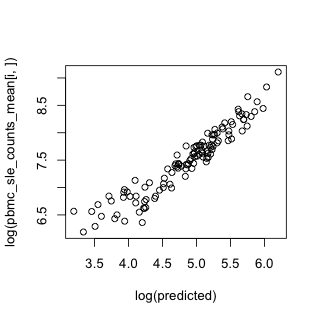

[1] 0.3104492

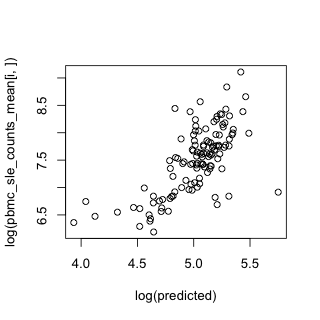

[1] 0.9631723

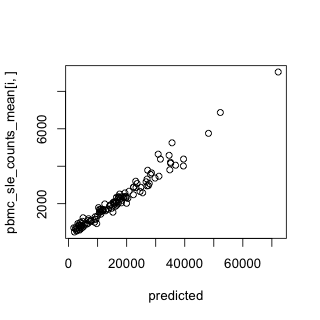

In [55]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=2
i=grep("^CD22$",expr_gene_names)[1]
predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop/100,
                               th_sle_counts_global_mean[i]*th_sle_prop/100,
                               b_sle_counts_global_mean[i]*b_sle_prop/100,
                               nk_sle_counts_global_mean[i]*nk_sle_prop/100, 
                               ncm_sle_counts_global_mean[i]*ncm_sle_prop/100,
                               tc_sle_counts_global_mean[i]*tc_sle_prop/100,
                          dc_sle_counts_global_mean[i]*dc_sle_prop/100), na.rm=T)
plot(log(predicted), log(pbmc_sle_counts_mean[i,]))
cor(predicted, pbmc_sle_counts_mean[i,])^2
output_sle_prop_noint[i,"adj r2"]

predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop_global_mean, 
                              th_sle_counts_mean[i,]*th_sle_prop_global_mean, 
                              b_sle_counts_mean[i,]*b_sle_prop_global_mean,
                              nk_sle_counts_mean[i,]*nk_sle_prop_global_mean, 
                               ncm_sle_counts_mean[i,]*ncm_sle_prop_global_mean,
                              tc_sle_counts_mean[i,]*tc_sle_prop_global_mean,##), na.rm=T)
                          dc_sle_counts_mean[i,]*dc_sle_prop_global_mean), na.rm=T)

plot(log(predicted), log(pbmc_sle_counts_mean[i,]))
cor(predicted, pbmc_sle_counts_mean[i,])^2

predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop, 
                              th_sle_counts_mean[i,]*th_sle_prop, 
                              b_sle_counts_mean[i,]*b_sle_prop,
                              nk_sle_counts_mean[i,]*nk_sle_prop, 
                               ncm_sle_counts_mean[i,]*ncm_sle_prop,
                              tc_sle_counts_mean[i,]*tc_sle_prop,
                          dc_sle_counts_mean[i,]*dc_sle_prop), na.rm=T)
plot(predicted, pbmc_sle_counts_mean[i,])
cor(predicted, pbmc_sle_counts_mean[i,])^2



### Now, let's downsample to 46 and redo SLE

In [56]:
cm_sle_down_counts_global_mean <- apply(exp(cm_sle_expr[,samples]),1,mean)
th_sle_down_counts_global_mean <- apply(exp(th_sle_expr[,samples]),1,mean)
tc_sle_down_counts_global_mean <- apply(exp(tc_sle_expr[,samples]),1,mean)
b_sle_down_counts_global_mean <- apply(exp(b_sle_expr[,samples]),1,mean)
nk_sle_down_counts_global_mean <- apply(exp(nk_sle_expr[,samples]),1,mean)
ncm_sle_down_counts_global_mean <- apply(exp(ncm_sle_expr[,samples]),1,mean)
dc_sle_down_counts_global_mean <- apply(exp(dc_sle_expr[,samples]),1,mean)

# cm_sle_down_counts_global_mean <- rowSums(exp(cm_sle_expr[,samples]))/sum((joined_pivot_sle$counts*cm_sle_prop/100)[samples])
# th_sle_down_counts_global_mean <- rowSums(exp(th_sle_expr[,samples]))/sum((joined_pivot_sle$counts*th_sle_prop/100)[samples])
# tc_sle_down_counts_global_mean <- rowSums(exp(tc_sle_expr[,samples]))/sum((joined_pivot_sle$counts*tc_sle_prop/100)[samples])
# b_sle_down_counts_global_mean <- rowSums(exp(b_sle_expr[,samples]),na.rm=T)/sum((joined_pivot_sle$counts*b_sle_prop/100)[samples],na.rm=T)
# nk_sle_down_counts_global_mean <- rowSums(exp(nk_sle_expr[,samples]))/sum((joined_pivot_sle$counts*nk_sle_prop/100)[samples])
# ncm_sle_down_counts_global_mean <- rowSums(exp(ncm_sle_expr[,samples]))/sum((joined_pivot_sle$counts*ncm_sle_prop/100)[samples])
# dc_sle_down_counts_global_mean <- rowSums(exp(dc_sle_expr[,samples]),na.rm=T)/sum((joined_pivot_sle$counts*dc_sle_prop/100)[samples],na.rm=T)

output_sle_down_direct_global_prop <- NULL;

for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),samples])) {    
    predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop[samples]/100, 
                               th_sle_counts_global_mean[i]*th_sle_prop[samples]/100, 
                               b_sle_counts_global_mean[i]*b_sle_prop[samples]/100, 
                               nk_sle_counts_global_mean[i]*nk_sle_prop[samples]/100, 
                               ncm_sle_counts_global_mean[i]*ncm_sle_prop[samples]/100, 
                               tc_sle_counts_global_mean[i]*tc_sle_prop[samples]/100,##), na.rm=T)
                               dc_sle_counts_global_mean[i]*dc_sle_prop[samples]/100), na.rm=T)

    output_sle_down_direct_global_prop <- rbind(output_sle_down_direct_global_prop,
                                                c(cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100))
}


rownames(output_sle_down_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
colnames(output_sle_down_direct_global_prop) <- c("r2", "res")

output_sle_down_direct_global_expr <- NULL;

cm_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*cm_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
th_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*th_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
tc_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*tc_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
b_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*b_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples],na.rm=T)
nk_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*nk_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
ncm_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*ncm_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
dc_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*dc_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples],na.rm=T)

for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {
   predicted <- rowSums(cbind(cm_sle_counts_mean[i,samples]*cm_sle_down_prop_global_mean,
                              th_sle_counts_mean[i,samples]*th_sle_down_prop_global_mean, 
                              b_sle_counts_mean[i,samples]*b_sle_down_prop_global_mean, 
                              nk_sle_counts_mean[i,samples]*nk_sle_down_prop_global_mean,
                              ncm_sle_counts_mean[i,samples]*ncm_sle_down_prop_global_mean, 
                              tc_sle_counts_mean[i,samples]*tc_sle_down_prop_global_mean,##), na.rm=T)
                              dc_sle_counts_mean[i,samples]*dc_sle_down_prop_global_mean), na.rm=T)

    output_sle_down_direct_global_expr <- rbind(output_sle_down_direct_global_expr, 
                                                c(cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100))
  
}


Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”

## Finally, processed the healthy

In [57]:
cm_healthy_counts_mean <- exp(cm_healthy_expr)
th_healthy_counts_mean <- exp(th_healthy_expr)
tc_healthy_counts_mean <- exp(tc_healthy_expr)
b_healthy_counts_mean <- exp(b_healthy_expr)
nk_healthy_counts_mean <- exp(nk_healthy_expr)
ncm_healthy_counts_mean <- exp(ncm_healthy_expr)
dc_healthy_counts_mean <- exp(dc_healthy_expr)
pbmc_healthy_counts_mean <- exp(pbmc_healthy_expr)


# cm_healthy_counts_mean <- sweep(exp(cm_healthy_expr), 2, joined_pivot_healthy$counts*cm_healthy_prop/100, "/")
# th_healthy_counts_mean <- sweep(exp(th_healthy_expr), 2, joined_pivot_healthy$counts*th_healthy_prop/100, "/")
# tc_healthy_counts_mean <- sweep(exp(tc_healthy_expr), 2, joined_pivot_healthy$counts*tc_healthy_prop/100, "/")
# b_healthy_counts_mean <- sweep(exp(b_healthy_expr), 2, joined_pivot_healthy$counts*b_healthy_prop/100, "/")
# nk_healthy_counts_mean <- sweep(exp(nk_healthy_expr), 2, joined_pivot_healthy$counts*nk_healthy_prop/100, "/")
# ncm_healthy_counts_mean <- sweep(exp(ncm_healthy_expr), 2, joined_pivot_healthy$counts*ncm_healthy_prop/100, "/")
# dc_healthy_counts_mean <- sweep(exp(dc_healthy_expr), 2, joined_pivot_healthy$counts*dc_healthy_prop/100, "/")
# pbmc_healthy_counts_mean <- sweep(exp(pbmc_healthy_expr), 2, joined_pivot_healthy$counts, "/")

cm_healthy_counts_global_mean <- apply(exp(cm_healthy_expr),1,mean)
th_healthy_counts_global_mean <- apply(exp(th_healthy_expr),1,mean)
tc_healthy_counts_global_mean <- apply(exp(tc_healthy_expr),1,mean)
b_healthy_counts_global_mean <- apply(exp(b_healthy_expr),1,mean)
nk_healthy_counts_global_mean <- apply(exp(nk_healthy_expr),1,mean)
ncm_healthy_counts_global_mean <- apply(exp(ncm_healthy_expr),1,mean)
dc_healthy_counts_global_mean <- apply(exp(dc_healthy_expr),1,mean)

# cm_healthy_counts_global_mean <- rowSums(exp(cm_healthy_expr))/sum(joined_pivot_healthy$counts*cm_healthy_prop/100, na.rm=T)
# th_healthy_counts_global_mean <- rowSums(exp(th_healthy_expr))/sum(joined_pivot_healthy$counts*th_healthy_prop/100, na.rm=T)
# tc_healthy_counts_global_mean <- rowSums(exp(tc_healthy_expr))/sum(joined_pivot_healthy$counts*tc_healthy_prop/100, na.rm=T)
# b_healthy_counts_global_mean <- rowSums(exp(b_healthy_expr))/sum(joined_pivot_healthy$counts*b_healthy_prop/100, na.rm=T)
# nk_healthy_counts_global_mean <- rowSums(exp(nk_healthy_expr))/sum(joined_pivot_healthy$counts*nk_healthy_prop/100, na.rm=T)
# ncm_healthy_counts_global_mean <- rowSums(exp(ncm_healthy_expr))/sum(joined_pivot_healthy$counts*ncm_healthy_prop/100, na.rm=T)
# dc_healthy_counts_global_mean <- rowSums(exp(dc_healthy_expr))/sum(joined_pivot_healthy$counts*dc_healthy_prop/100, na.rm=T)

##healthy_counts_means <- cbind(cm_healthy_counts_mean, th_healthy_counts_mean, tc_healthy_counts_mean, b_healthy_counts_mean, nk_healthy_counts_mean, ncm_healthy_counts_mean, dc_healthy_counts_mean)

output_healthy_direct_global_prop <- NULL;

for(i in 1:nrow(pbmc_healthy_counts[match(expr_gene_names, counts_gene_names),])) {    
    predicted <- rowSums(cbind(cm_healthy_counts_global_mean[i]*cm_healthy_prop/100,
                               th_healthy_counts_global_mean[i]*th_healthy_prop/100,
                               b_healthy_counts_global_mean[i]*b_healthy_prop/100,
                               nk_healthy_counts_global_mean[i]*nk_healthy_prop/100, 
                               ncm_healthy_counts_global_mean[i]*ncm_healthy_prop/100,
                               tc_healthy_counts_global_mean[i]*tc_healthy_prop/100,##), na.rm=T)
                               dc_healthy_counts_global_mean[i]*dc_healthy_prop/100),na.rm=T)

    output_healthy_direct_global_prop <- rbind(output_healthy_direct_global_prop, 
                                               c(cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100))
}


rownames(output_healthy_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
colnames(output_healthy_direct_global_prop) <- c("r2", "res")

output_healthy_direct_global_expr <- NULL;

cm_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*cm_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
th_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*th_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
tc_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*tc_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
b_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*b_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
nk_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*nk_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
ncm_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*ncm_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
dc_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*dc_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)

for(i in 1:nrow(pbmc_healthy_counts[match(expr_gene_names, counts_gene_names),])) {
   predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop_global_mean,
                              th_healthy_counts_mean[i,]*th_healthy_prop_global_mean,
                              b_healthy_counts_mean[i,]*b_healthy_prop_global_mean,
                              nk_healthy_counts_mean[i,]*nk_healthy_prop_global_mean, 
                               ncm_healthy_counts_mean[i,]*ncm_healthy_prop_global_mean,
                              tc_healthy_counts_mean[i,]*tc_healthy_prop_global_mean,##), na.rm=T)
                              dc_healthy_counts_mean[i]*dc_healthy_prop_global_mean),na.rm=T)

   ##output_healthy_direct_global_expr <- rbind(output_healthy_direct_global_expr, c(var(predicted)/var(pbmc_healthy_counts_mean[i,],na.rm=T)*100, 100-var(predicted)/var(pbmc_healthy_counts_mean[i,],na.rm=T)*100))
  output_healthy_direct_global_expr <- rbind(output_healthy_direct_global_expr, 
                                         c(cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100))
}

rownames(output_healthy_direct_global_expr) <- expr_gene_names;
colnames(output_healthy_direct_global_expr) <- c("r2", "res")

[1] 78.71307

[1] 78.13379

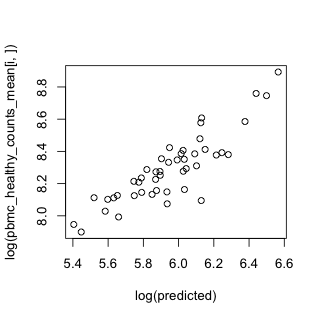

[1] 0.07101551

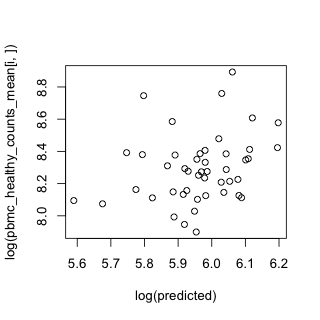

[1] 0.9230189

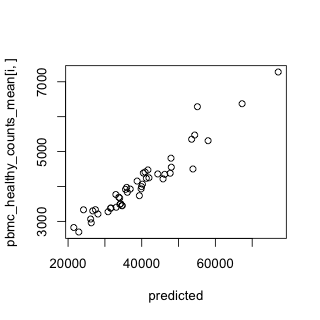

In [58]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=10
i=grep("^CD22$",expr_gene_names)[1]
predicted <- rowSums(cbind(cm_healthy_counts_global_mean[i]*cm_healthy_prop/100,
                               th_healthy_counts_global_mean[i]*th_healthy_prop/100,
                               b_healthy_counts_global_mean[i]*b_healthy_prop/100,
                               nk_healthy_counts_global_mean[i]*nk_healthy_prop/100, 
                               ncm_healthy_counts_global_mean[i]*ncm_healthy_prop/100,
                               tc_healthy_counts_global_mean[i]*tc_healthy_prop/100,
                          dc_healthy_counts_global_mean[i]*dc_healthy_prop/100), na.rm=T)
plot(log(predicted), log(pbmc_healthy_counts_mean[i,]))
cor(predicted, pbmc_healthy_counts_mean[i,])^2*100
output_healthy_prop_noint[i,"adj r2"]

predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop_global_mean, 
                              th_healthy_counts_mean[i,]*th_healthy_prop_global_mean, 
                              b_healthy_counts_mean[i,]*b_healthy_prop_global_mean,
                              nk_healthy_counts_mean[i,]*nk_healthy_prop_global_mean, 
                               ncm_healthy_counts_mean[i,]*ncm_healthy_prop_global_mean,
                              tc_healthy_counts_mean[i,]*tc_healthy_prop_global_mean,
                          dc_healthy_counts_mean[i,]*dc_healthy_prop_global_mean), na.rm=T)
plot(log(predicted), log(pbmc_healthy_counts_mean[i,]))
cor(predicted, pbmc_healthy_counts_mean[i,])^2


predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop, 
                              th_healthy_counts_mean[i,]*th_healthy_prop, 
                              b_healthy_counts_mean[i,]*b_healthy_prop,
                              nk_healthy_counts_mean[i,]*nk_healthy_prop, 
                               ncm_healthy_counts_mean[i,]*ncm_healthy_prop,
                              tc_healthy_counts_mean[i,]*tc_healthy_prop,
                          dc_healthy_counts_mean[i,]*dc_healthy_prop), na.rm=T)
plot(predicted, pbmc_healthy_counts_mean[i,])
cor(predicted, pbmc_healthy_counts_mean[i,])^2

## Plotting

cor        prop_mean expr_mean sum_mean
all_noint      -0.7591694 24.61925  72.16172  96.78097
sle_noint      -0.7158317 26.39149  71.29493  97.68642
sle_down_noint -0.5944909 28.90651  68.70937  97.61588
healthy_noint  -0.6929161 15.66379  81.05340  96.71719

cM        Th        B        NK       ncM      Tc      
all_noint_prop       6.591895  3.603827 3.691199 1.593518 2.143269 1.998259
all_noint_expr      17.966246 14.540826 4.998053 3.582716 3.347980 5.649917
sle_noint_prop       6.565472  4.220205 4.180011 1.769411 2.365569 2.379810
sle_noint_expr      19.398465 13.034096 4.729852 3.554830 3.433715 5.899630
sle_down_noint_prop  7.793977  5.661143 5.418460 2.905992 3.683078 2.120368
sle_down_noint_expr 17.726450 14.093738 5.943889 4.139314 4.086777 6.018612
healthy_noint_prop   6.317894  3.282844 3.535246 3.553473 3.033576 2.033618
healthy_noint_expr  14.955112 25.049785 7.851389 4.649728 3.745158 5.783015
                    DC       total.r2 adj.r2  
all_noint_prop      1.348382 20.97035 24.61925
all_noint_expr      1.906411 51.99215 72.16172
sle_noint_prop      1.856630 23.33711 26.39149
sle_noint_expr      1.734586 51.78517 71.29493
sle_down_noint_prop 2.764167 30.34719 28.90651
sle_down_noint_expr 2.361249 54.37003 68.70937
healthy_noint_prop  2.682292 24.43894 15.66379
healthy_noint_expr  3.916366 65.95055 81.05340

Warning message:
“Removed 21 rows containing missing values (geom_point).”

Warning message:
“Removed 21 rows containing missing values (geom_point).”

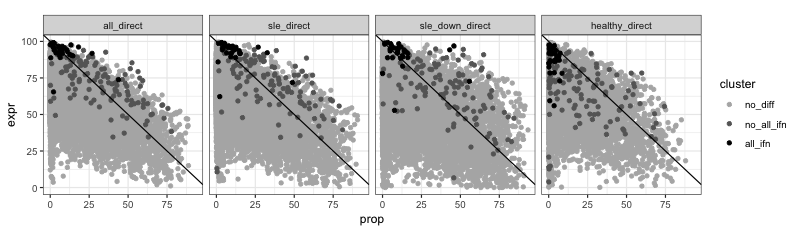

Warning message:
“Removed 21 rows containing missing values (geom_point).”

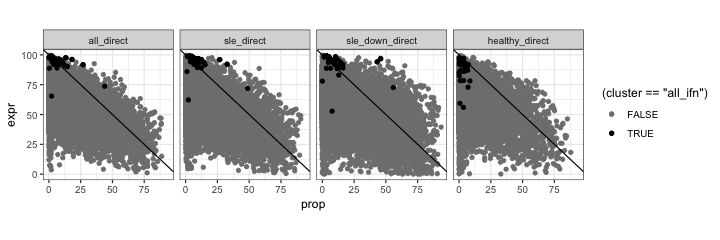

Warning message:
“Removed 21 rows containing missing values (geom_point).”

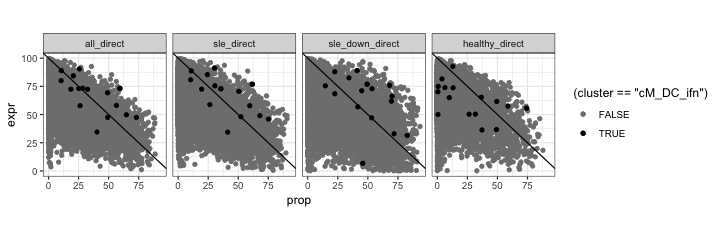

Warning message:
“Removed 21 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing missing values (geom_point).”

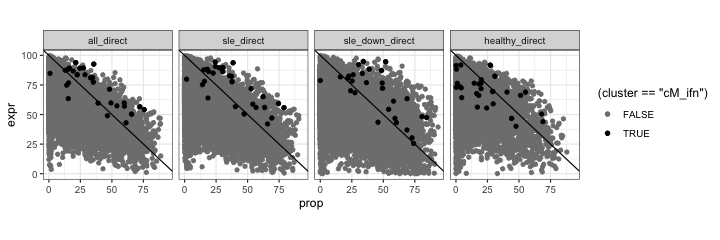

Warning message:
“Removed 21 rows containing missing values (geom_point).”

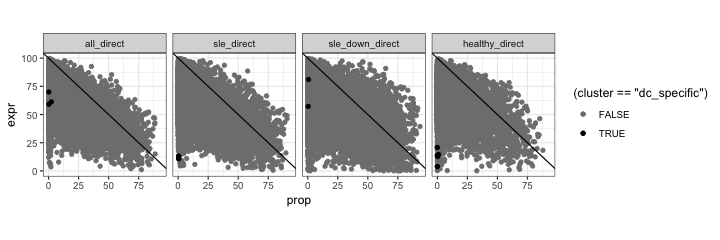

Warning message:
“Removed 21 rows containing missing values (geom_point).”

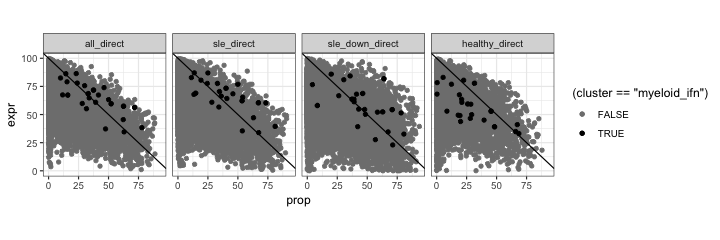

Warning message:
“Removed 21 rows containing missing values (geom_point).”

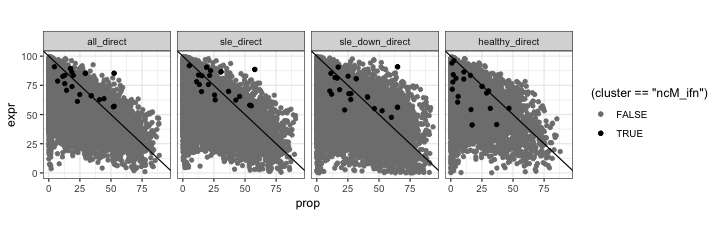

Warning message:
“Removed 21 rows containing missing values (geom_point).”

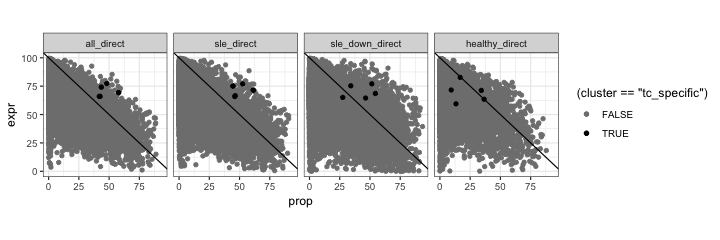

cor        prop_mean expr_mean sum_mean
all_direct      -0.5849835 14.26022  60.23466  74.50812
sle_direct      -0.5454848 15.24099  59.28679  74.54252
sle_down_direct -0.4876168 18.51701  57.21355  75.73705
healthy_direct  -0.4006117 10.31975  62.46383  72.78357

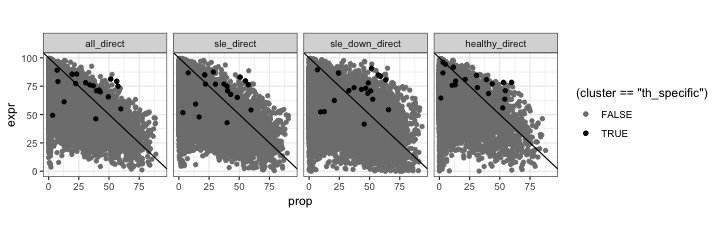

In [59]:
df2 <- data.frame(cor=c(cor(output_prop_noint[,"adj r2"], output_expr_noint[,"adj r2"]), cor(output_sle_prop_noint[,"adj r2"], output_sle_expr_noint[,"adj r2"]), cor(output_sle_down_prop_noint[,"adj r2"], output_sle_down_expr_noint[,"adj r2"]), cor(output_healthy_prop_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])),
      prop_mean=c(mean(output_prop_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"])),
      expr_mean=c(mean(output_expr_noint[,"adj r2"]), mean(output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_expr_noint[,"adj r2"])),
      sum_mean = c(mean(output_prop_noint[,"adj r2"]+output_expr_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]+output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]+output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"]+output_healthy_expr_noint[,"adj r2"])))
rownames(df2) <- c("all_noint", "sle_noint", "sle_down_noint", "healthy_noint")

df2

df3 <- rbind(data.frame(t(apply(output_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_expr_noint,2,mean,na.rm=T))),
             data.frame(t(apply(output_sle_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_down_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_down_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_healthy_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_healthy_expr_noint,2,mean,na.rm=T))))

rownames(df3) <- c("all_noint_prop", "all_noint_expr", "sle_noint_prop", "sle_noint_expr", "sle_down_noint_prop", "sle_down_noint_expr", "healthy_noint_prop", "healthy_noint_expr")

df3


output_direct_global_df <- data.frame(prop=output_direct_global_prop[,1], expr=output_direct_global_expr[,1], type="all_direct")
output_direct_global_df$cluster <- "no_diff";
output_direct_global_df$cluster[match(cuttree_out[,"gene"],rownames(output_direct_global_df))] <- cuttree_out[,"cluster"];

output_sle_direct_global_df <- data.frame(prop=output_sle_direct_global_prop[,1], expr=output_sle_direct_global_expr[,1], type="sle_direct")
output_sle_direct_global_df$cluster <- "no_diff";
output_sle_direct_global_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_direct_global_df))] <- cuttree_out[,"cluster"];

output_sle_down_direct_global_df <- data.frame(prop=output_sle_down_direct_global_prop[,1], expr=output_sle_down_direct_global_expr[,1], type="sle_down_direct")
output_sle_down_direct_global_df$cluster <- "no_diff";
output_sle_down_direct_global_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_down_direct_global_df))] <- cuttree_out[,"cluster"];

output_healthy_direct_global_df <- data.frame(prop=output_healthy_direct_global_prop[,1], expr=output_healthy_direct_global_expr[,1], type="healthy_direct")
output_healthy_direct_global_df$cluster <- "no_diff";
output_healthy_direct_global_df$cluster[match(cuttree_out[,"gene"],rownames(output_healthy_direct_global_df))] <- cuttree_out[,"cluster"];

df <- rbind(output_direct_global_df, output_sle_direct_global_df, output_sle_down_direct_global_df, output_healthy_direct_global_df)
df$cluster <- as.factor(df$cluster)


options(repr.plot.width = 10, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff" & df_all_ifn$cluster != "all_ifn")] <- "no_all_ifn";
df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","no_all_ifn","all_ifn"));
df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]
ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)


options(repr.plot.width = 9, repr.plot.height = 3)
ggplot(aes(prop, expr,color=(cluster=="all_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'all_ifn'),
             aes(x = prop, y = expr, color = (cluster=="all_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="cM_DC_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_DC_ifn'),
             aes(x = prop, y = expr, color = (cluster=="cM_DC_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="cM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_ifn'),
             aes(x = prop, y = expr, color = (cluster=="cM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="dc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'dc_specific'),
             aes(x = prop, y = expr, color = (cluster=="dc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="myeloid_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'myeloid_ifn'),
             aes(x = prop, y = expr, color = (cluster=="myeloid_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="ncM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'ncM_ifn'),
             aes(x = prop, y = expr, color = (cluster=="ncM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="tc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'tc_specific'),
             aes(x = prop, y = expr, color = (cluster=="tc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="th_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'th_specific'),
             aes(x = prop, y = expr, color = (cluster=="th_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)

df2 <- data.frame(cor=c(cor(output_direct_global_prop[,1], output_direct_global_expr[,1],use='complete.obs'), 
                        cor(output_sle_direct_global_prop[,1], output_sle_direct_global_expr[,1],use='complete.obs'), 
                        cor(output_sle_down_direct_global_prop[,1], output_sle_down_direct_global_expr[,1],use='complete.obs'),
                        cor(output_healthy_direct_global_prop[,1], output_healthy_direct_global_expr[,1])),
      prop_mean=c(mean(output_direct_global_prop[,1],na.rm=T), mean(output_sle_direct_global_prop[,1],na.rm=T), mean(output_sle_down_direct_global_prop[,1],na.rm=T), mean(output_healthy_direct_global_prop[,1])),
      expr_mean=c(mean(output_direct_global_expr[,1]), mean(output_sle_direct_global_expr[,1]), mean(output_sle_down_direct_global_expr[,1]), mean(output_healthy_direct_global_expr[,1])),
      sum_mean = c(mean(output_direct_global_prop[,1]+output_direct_global_expr[,1],na.rm=T), mean(output_sle_direct_global_prop[,1]+output_sle_direct_global_expr[,1],na.rm=T), mean(output_sle_down_direct_global_prop[,1]+output_sle_down_direct_global_expr[,1],na.rm=T), mean(output_healthy_direct_global_prop[,1]+output_healthy_direct_global_expr[,1])))
rownames(df2) <- c("all_direct", "sle_direct", "sle_down_direct", "healthy_direct")

df2


## Compare to previous estimates using linear regression

Warning message:
“Removed 5021 rows containing missing values (geom_point).”

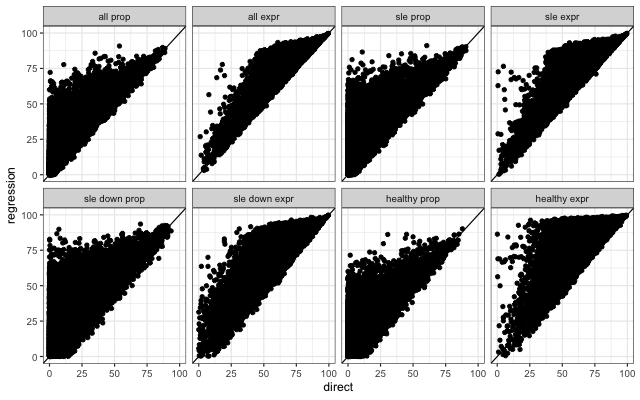

In [60]:
df <- rbind(data.frame(direct=output_direct_global_prop[,1], regression=output_prop_noint[,"adj r2"], type="all prop"),
            data.frame(direct=output_direct_global_expr[,1], regression=output_expr_noint[,"adj r2"], type="all expr"),
            
            data.frame(direct=output_sle_direct_global_prop[,1], regression=output_sle_prop_noint[,"adj r2"], type="sle prop"),
            data.frame(direct=output_sle_direct_global_expr[,1], regression=output_sle_expr_noint[,"adj r2"], type="sle expr"),
            
            data.frame(direct=output_sle_down_direct_global_prop[,1], regression=output_sle_down_prop_noint[,"adj r2"], type="sle down prop"),
            data.frame(direct=output_sle_down_direct_global_expr[,1], regression=output_sle_down_expr_noint[,"adj r2"], type="sle down expr"),
            
            data.frame(direct=output_healthy_direct_global_prop[,1], regression=output_healthy_prop_noint[,"adj r2"], type="healthy prop"),
            data.frame(direct=output_healthy_direct_global_expr[,1], regression=output_healthy_expr_noint[,"adj r2"], type="healthy expr"))
  
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(aes(direct, regression), data=df)+geom_point()+facet_wrap(~ type, nrow = 2)+theme_bw()+xlim(0,100)+ylim(0,100)+geom_abline(slope=1, intercept=0,
  na.rm = FALSE, show.legend = NA)
##ggplot(aes(direct, regression), data=df)+geom_point()+facet_wrap(~ type, nrow = 2)+theme_bw()+geom_abline(slope=1, intercept=0,
##  na.rm = FALSE, show.legend = NA)


In [61]:
cor(output_sle_direct_global_prop[,1], output_sle_prop_noint[,"adj r2"],use='complete.obs')
cor(output_sle_direct_global_expr[,1], output_sle_expr_noint[,"adj r2"])

cor(output_sle_down_direct_global_prop[,1], output_sle_down_prop_noint[,"adj r2"],use='complete.obs')
cor(output_sle_down_direct_global_expr[,1], output_sle_down_expr_noint[,"adj r2"])

cor(output_healthy_direct_global_prop[,1], output_healthy_prop_noint[,"adj r2"])
cor(output_healthy_direct_global_expr[,1], output_healthy_expr_noint[,"adj r2"])

[1] 0.8119983

[1] 0.8822565

[1] 0.7821165

[1] 0.8659651

[1] 0.765388

[1] 0.704806

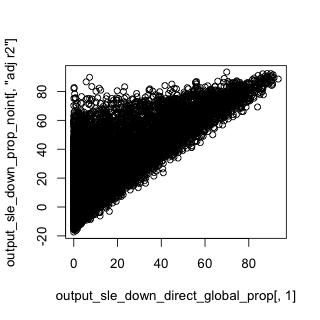

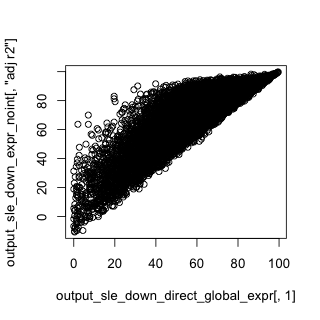

In [62]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_direct_global_prop[,1], output_sle_down_prop_noint[,"adj r2"])
plot(output_sle_down_direct_global_expr[,1], output_sle_down_expr_noint[,"adj r2"])


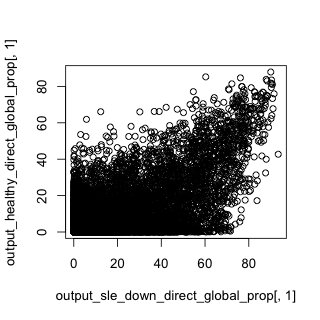

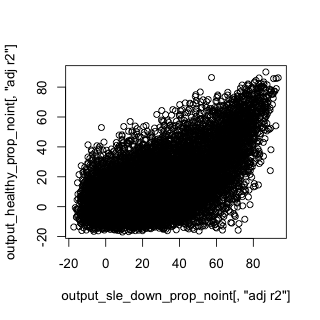

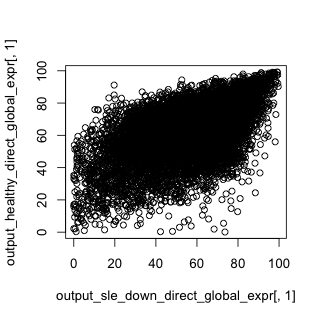

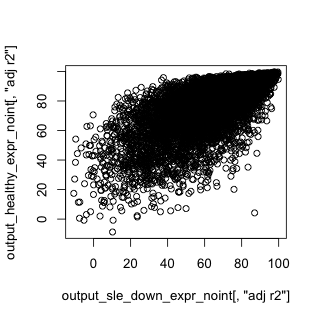

In [63]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_direct_global_prop[,1], output_healthy_direct_global_prop[,1])
plot(output_sle_down_prop_noint[,"adj r2"], output_healthy_prop_noint[,"adj r2"])
plot(output_sle_down_direct_global_expr[,1], output_healthy_direct_global_expr[,1])
plot(output_sle_down_expr_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])

# Load the cell type proportion estimates using the ```joined_pivot.txt``` generated by the Figure 1 code

In [64]:
# ifn = read.table("v2.ifn.sig.txt", sep=" ",header=T)
# ifn$name = sapply(ifn$name, function(x) {strsplit(as.character(x), "_")[[1]][[1]]})
# ifn

# match(colnames(pbmc_expr),joined_pivot$ind_cov)

# Correlate cell type specific expression with over all expression

No id variables; using all as measure variables
No id variables; using all as measure variables


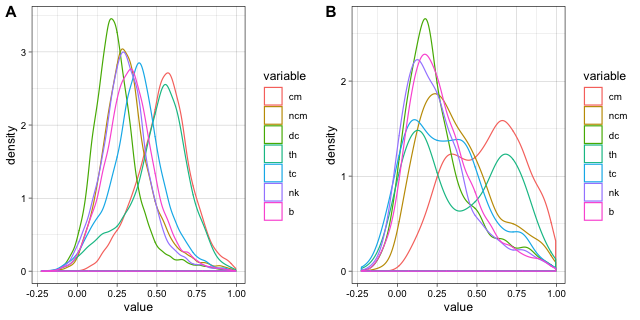

In [65]:
pbmc_cm_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],cm_expr[i,],use='complete.obs')})
pbmc_th_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],th_expr[i,],use='complete.obs')})
pbmc_b_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],b_expr[i,],use='complete.obs')})
pbmc_nk_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],nk_expr[i,],use='complete.obs')})
pbmc_ncm_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],ncm_expr[i,],use='complete.obs')})
pbmc_tc_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],tc_expr[i,],use='complete.obs')})
pbmc_dc_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],dc_expr[i,],use='complete.obs')})

mat_expr_cor <- data.frame(cm=pbmc_cm_expr_cor,
                           ncm=pbmc_ncm_expr_cor,
                             dc=pbmc_dc_expr_cor,
                           th=pbmc_th_expr_cor,
                           tc=pbmc_tc_expr_cor,
                          nk=pbmc_nk_expr_cor,
                          b=pbmc_b_expr_cor)
df_expr_cor <- melt(mat_expr_cor)
ggplot1 <- ggplot(aes(value,color=variable), data=df_expr_cor)+geom_density()+theme_linedraw();

mat_expr_cor_sig <- mat_expr_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_expr_cor_sig <- melt(mat_expr_cor_sig)
ggplot2 <- ggplot(aes(value,color=variable), data=df_expr_cor_sig)+geom_density()+theme_linedraw();

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")

## Let's plot the shifts in distribution for just the SLE samples

No id variables; using all as measure variables
No id variables; using all as measure variables


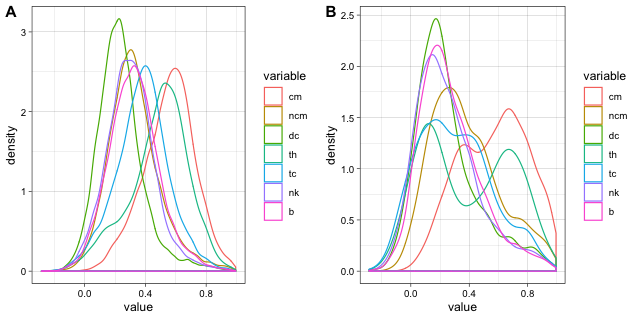

In [66]:
pbmc_cm_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],cm_sle_expr[i,],use='complete.obs')})
pbmc_th_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],th_sle_expr[i,],use='complete.obs')})
pbmc_b_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],b_sle_expr[i,],use='complete.obs')})
pbmc_nk_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],nk_sle_expr[i,],use='complete.obs')})
pbmc_ncm_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],ncm_sle_expr[i,],use='complete.obs')})
pbmc_tc_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],tc_sle_expr[i,],use='complete.obs')})
pbmc_dc_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],dc_sle_expr[i,],use='complete.obs')})

mat_sle_expr_cor <- data.frame(cm=pbmc_cm_sle_expr_cor,
                           ncm=pbmc_ncm_sle_expr_cor,
                             dc=pbmc_dc_sle_expr_cor,
                           th=pbmc_th_sle_expr_cor,
                           tc=pbmc_tc_sle_expr_cor,
                          nk=pbmc_nk_sle_expr_cor,
                          b=pbmc_b_sle_expr_cor)
df_sle_expr_cor <- melt(mat_sle_expr_cor)
ggplot1 <- ggplot(aes(value,color=variable), data=df_sle_expr_cor)+geom_density()+theme_linedraw();

mat_sle_expr_cor_sig <- mat_sle_expr_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_sle_expr_cor_sig <- melt(mat_sle_expr_cor_sig)
ggplot2 <- ggplot(aes(value,color=variable), data=df_sle_expr_cor_sig)+geom_density()+theme_linedraw();

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")

## Let's plot the shifts in distribution for just the healthy samples

Warning message in cor(pbmc_healthy_expr[i, ], cm_healthy_expr[i, ], use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(pbmc_healthy_expr[i, ], nk_healthy_expr[i, ], use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(pbmc_healthy_expr[i, ], nk_healthy_expr[i, ], use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(pbmc_healthy_expr[i, ], ncm_healthy_expr[i, ], use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(pbmc_healthy_expr[i, ], ncm_healthy_expr[i, ], use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(pbmc_healthy_expr[i, ], ncm_healthy_expr[i, ], use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(pbmc_healthy_expr[i, ], tc_healthy_expr[i, ], use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(pbmc_healthy_expr[i, ], dc_healthy_expr[i, ], use = "complete.obs"):
“the standard deviation is zero”Warni

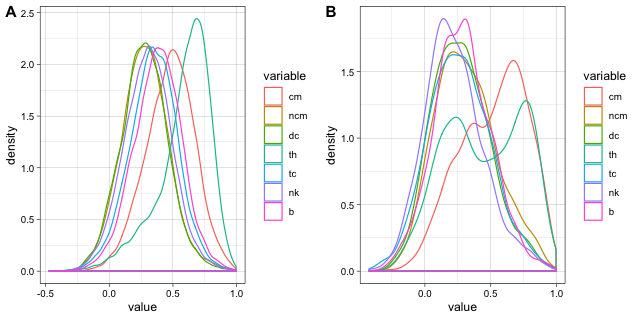

In [67]:
pbmc_cm_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],cm_healthy_expr[i,],use='complete.obs')})
pbmc_th_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],th_healthy_expr[i,],use='complete.obs')})
pbmc_b_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],b_healthy_expr[i,],use='complete.obs')})
pbmc_nk_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],nk_healthy_expr[i,],use='complete.obs')})
pbmc_ncm_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],ncm_healthy_expr[i,],use='complete.obs')})
pbmc_tc_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],tc_healthy_expr[i,],use='complete.obs')})
pbmc_dc_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],dc_healthy_expr[i,],use='complete.obs')})

mat_healthy_expr_cor <- data.frame(cm=pbmc_cm_healthy_expr_cor,
                           ncm=pbmc_ncm_healthy_expr_cor,
                             dc=pbmc_dc_healthy_expr_cor,
                           th=pbmc_th_healthy_expr_cor,
                           tc=pbmc_tc_healthy_expr_cor,
                          nk=pbmc_nk_healthy_expr_cor,
                          b=pbmc_b_healthy_expr_cor)
df_healthy_expr_cor <- melt(mat_healthy_expr_cor)
ggplot1 <- ggplot(aes(value,color=variable), data=df_healthy_expr_cor)+geom_density()+theme_linedraw();

mat_healthy_expr_cor_sig <- mat_healthy_expr_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_healthy_expr_cor_sig <- melt(mat_healthy_expr_cor_sig)
ggplot2 <- ggplot(aes(value,color=variable), data=df_healthy_expr_cor_sig)+geom_density()+theme_linedraw();

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")

# Let's look at contribution to total gene expression from each of the cell types

In [68]:
pbmc_cm_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(cm_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_ncm_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(ncm_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_th_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(th_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_tc_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(tc_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_nk_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(nk_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_b_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(b_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_dc_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(dc_counts[i,]/pbmc_counts[i,],na.rm=T)});

No id variables; using all as measure variables
No id variables; using all as measure variables


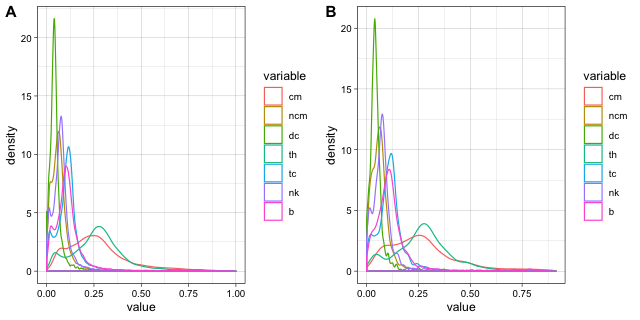

In [69]:
mat_counts_rat <- data.frame(cm=pbmc_cm_counts_rat,
                           ncm=pbmc_ncm_counts_rat,
                            dc=pbmc_dc_counts_rat,
                           th=pbmc_th_counts_rat,
                           tc=pbmc_tc_counts_rat,
                          nk=pbmc_nk_counts_rat,
                          b=pbmc_b_counts_rat)
df_counts_rat <- melt(mat_counts_rat)
ggplot1 <- ggplot(aes(value,color=variable), data=df_counts_rat)+geom_density()+theme_linedraw();

mat_counts_rat_sig <- mat_counts_rat[match(pbmc_deseq_sig,expr_gene_names),]
df_counts_rat_sig <- melt(mat_counts_rat_sig)
ggplot2 <- ggplot(aes(value,color=variable), data=df_counts_rat_sig)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")

# Correlate cell type proportion estimate with overall expression

No id variables; using all as measure variables
No id variables; using all as measure variables


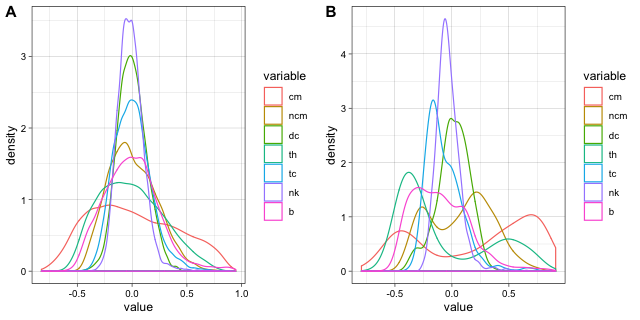

In [70]:
pbmc_cm_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],cm_prop,use='complete.obs')})
pbmc_th_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],th_prop,use='complete.obs')})
pbmc_b_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],b_prop,use='complete.obs')})
pbmc_nk_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],nk_prop,use='complete.obs')})
pbmc_ncm_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],ncm_prop,use='complete.obs')})
pbmc_tc_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],tc_prop,use='complete.obs')})
pbmc_dc_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],dc_prop,use='complete.obs')})

mat_prop_cor <- data.frame(cm=pbmc_cm_prop_cor,
                           ncm=pbmc_ncm_prop_cor,
                           dc=pbmc_dc_prop_cor,
                           th=pbmc_th_prop_cor,
                           tc=pbmc_tc_prop_cor,
                          nk=pbmc_nk_prop_cor,
                          b=pbmc_b_prop_cor)
df_prop_cor <- melt(mat_prop_cor)
ggplot1 = ggplot(aes(value,color=variable), data=df_prop_cor)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

mat_prop_cor_sig <- mat_prop_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_prop_cor_sig <- melt(mat_prop_cor_sig)
ggplot2 = ggplot(aes(value,color=variable), data=df_prop_cor_sig)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")


No id variables; using all as measure variables
No id variables; using all as measure variables


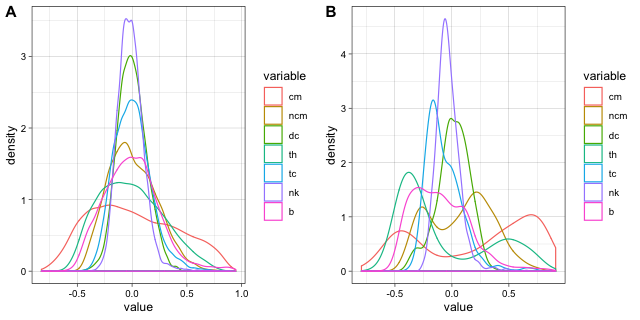

In [71]:
pbmc_std_expr <- t(apply(pbmc_expr,1,standardize));

pbmc_std_cm_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],cm_prop,use='complete.obs')})
pbmc_std_th_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],th_prop,use='complete.obs')})
pbmc_std_b_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],b_prop,use='complete.obs')})
pbmc_std_nk_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],nk_prop,use='complete.obs')})
pbmc_std_ncm_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],ncm_prop,use='complete.obs')})
pbmc_std_tc_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],tc_prop,use='complete.obs')})
pbmc_std_dc_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],dc_prop,use='complete.obs')})

mat_prop_cor <- data.frame(cm=pbmc_std_cm_prop_cor,
                           ncm=pbmc_std_ncm_prop_cor,
                           dc=pbmc_std_dc_prop_cor,
                           th=pbmc_std_th_prop_cor,
                           tc=pbmc_std_tc_prop_cor,
                          nk=pbmc_std_nk_prop_cor,
                          b=pbmc_std_b_prop_cor)
df_prop_cor <- melt(mat_prop_cor)
ggplot1 = ggplot(aes(value,color=variable), data=df_prop_cor)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

mat_prop_cor_sig <- mat_prop_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_prop_cor_sig <- melt(mat_prop_cor_sig)
ggplot2 = ggplot(aes(value,color=variable), data=df_prop_cor_sig)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")


## Some sanity checking code

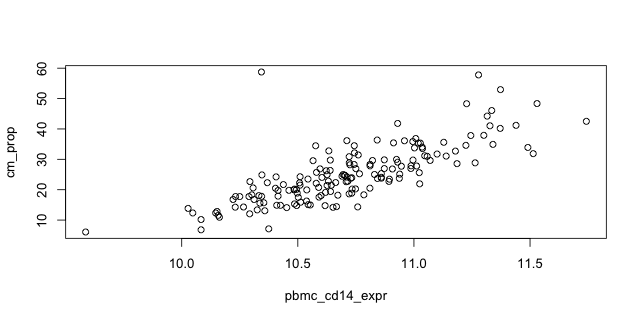

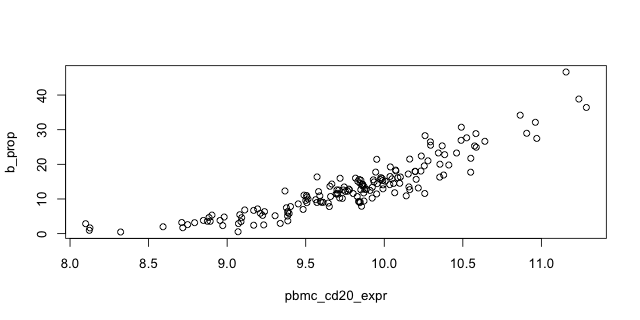

In [72]:
pbmc_cd14_expr = pbmc_expr[which(expr_gene_names=="CD14"),];
plot(pbmc_cd14_expr,cm_prop)

pbmc_cd20_expr = pbmc_expr[which(expr_gene_names=="MS4A1"),];
plot(pbmc_cd20_expr,b_prop)

In [73]:
cor(pbmc_cd14_expr, cm_prop, use='complete.obs')

[1] 0.7703384

In [74]:
counts <- fread("counts.txt",sep=",")
counts$V1 <- sapply(counts$V1, function(x) {strsplit(x,"_")[[1]][[1]]})
counts <- counts[match(colnames(pbmc_counts),counts$V1),]

In [75]:
pbmc_counts_norm <- as.matrix(sweep(pbmc_counts, 2, counts$V2, "/"))
pbmc_counts <- as.matrix(pbmc_counts) ##pbmc_counts_norm <- sapply(1:ncol(pbmc_counts), function(i) {pbmc_counts[,..i]/counts$V2[match(colnames(pbmc_counts)[i],counts$V1)]})

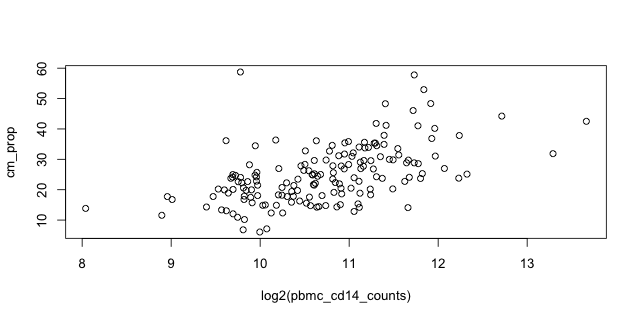

In [76]:
pbmc_cd14_counts <- pbmc_counts[which(counts_gene_names=="CD14"),match(joined_pivot_filtered$ind_cov,colnames(pbmc_counts))]
plot(log2(pbmc_cd14_counts), cm_prop)

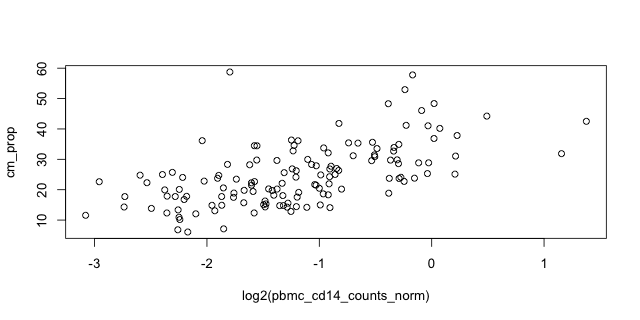

In [77]:
pbmc_cd14_counts_norm <- pbmc_counts_norm[which(counts_gene_names=="CD14"),match(joined_pivot_filtered$ind_cov,colnames(pbmc_counts))]
plot(log2(pbmc_cd14_counts_norm), cm_prop)

In [78]:
cor(log2(pbmc_cd14_counts), cm_prop,use='complete')

[1] 0.5333116

In [79]:
cor(log2(pbmc_cd14_counts_norm), cm_prop,use='complete')

[1] 0.5822655

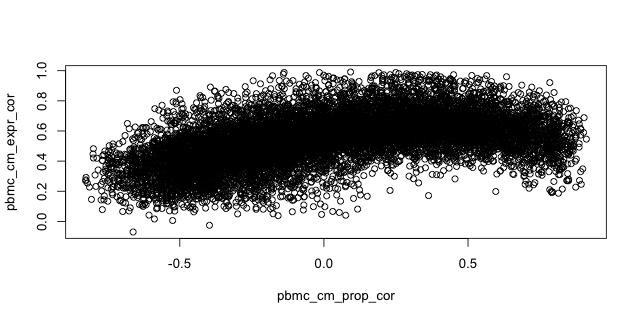

In [80]:
plot(pbmc_cm_prop_cor, pbmc_cm_expr_cor)

## Do a formal test for significance to expression and proportion

In [81]:
pbmc_cm_expr_r2 <- sapply(1:nrow(pbmc_expr), function(i) {summary(lm(pbmc_expr[i,]~cm_expr[i,]))$r.squared})
pbmc_cm_expr_p <- sapply(1:nrow(pbmc_expr), function(i) {anova(lm(pbmc_expr[i,]~cm_expr[i,]))$"Pr(>F)"}[[1]])

In [82]:
pbmc_cm_prop_r2 <- sapply(1:nrow(pbmc_expr), function(i) {summary(lm(pbmc_expr[i,]~cm_prop))$r.squared})
pbmc_cm_prop_p <- sapply(1:nrow(pbmc_expr), function(i) {anova(lm(pbmc_expr[i,]~cm_prop))$"Pr(>F)"}[[1]])

In [83]:
pbmc_cm_expr_prop_r2 <- sapply(1:nrow(pbmc_expr), function(i) {summary(lm(pbmc_expr[i,]~cm_expr[i,]+cm_prop))$r.squared})
pbmc_cm_expr_prop_p <- sapply(1:nrow(pbmc_expr), function(i) {anova(lm(pbmc_expr[i,]~cm_expr[i,]+cm_prop))$"Pr(>F)"}[[1]])

In [84]:
cm_expr_cm_prop_r2 <- sapply(1:nrow(cm_expr), function(i) {summary(lm(cm_expr[i,]~cm_prop))$r.squared})
cm_expr_cm_prop_p <- sapply(1:nrow(cm_expr), function(i) {anova(lm(cm_expr[i,]~cm_prop))$"Pr(>F)"}[[1]])

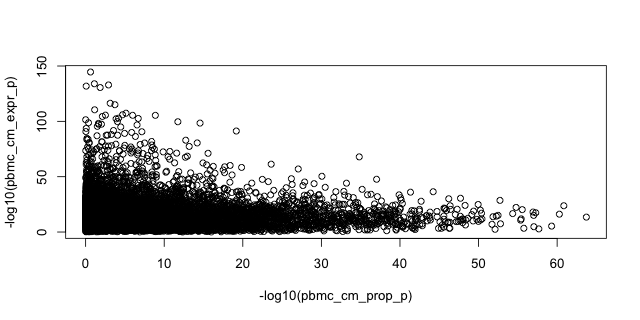

In [85]:
plot(-log10(pbmc_cm_prop_p), -log10(pbmc_cm_expr_p))
pbmc_cm_prop_sig <- which(pbmc_cm_prop_p<1e-15)
pbmc_cm_expr_sig <- which(pbmc_cm_expr_p<1e-30)
#text(-log10(cd14_prop_p)[cd14_prop_sig], -log10(cd14_expr_p)[cd14_prop_sig], labels=gene_names[cd14_prop_sig], col="red")
#text(-log10(cd14_prop_p)[cd14_expr_sig], -log10(cd14_expr_p)[cd14_expr_sig], labels=gene_names[cd14_expr_sig], col="blue")

In [86]:
pbmc_cm_total_r2 = pbmc_cm_prop_r2+pbmc_cm_expr_r2

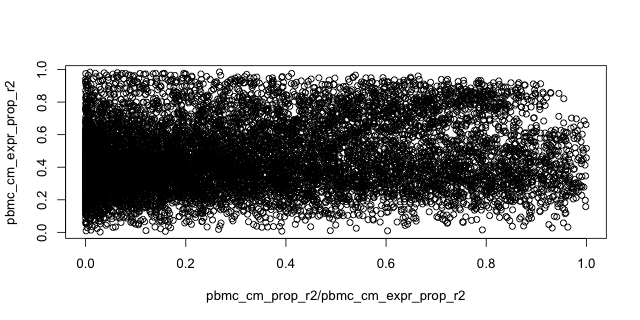

In [87]:
plot(pbmc_cm_prop_r2/pbmc_cm_expr_prop_r2, pbmc_cm_expr_prop_r2)

In [88]:
# ## let's get the batch information
# covars <- fread("/ye/yelabstore2/10x.lupus/eqtls/v2/v2.covs.csv",header=T)
# covars <- covars[,c("ind", "well", "disease", "pop", "batch")]
# covars <- covars[!duplicated(covars$ind),]
# covars$ind[grep("1891",covars$ind)] <- "1891";
# covars$ind[grep("1221",covars$ind)] <- "1221";
# covars$ind[grep("1251",covars$ind)] <- "1251";

# ifn <- fread("v2.ifn.sig.txt");
# ifn$V1[grep("1891",ifn$V1)] <- "1891";
# ifn$V1[grep("1221",ifn$V1)] <- "1221";
# ifn$V1[grep("1251",ifn$V1)] <- "1251";


# ## get clinical data
# clinical = fread("/ye/yelabstore2/10x.lupus/clinical.data/v2/v2.clinical.data.txt",header=T,sep="\t")
# clinical$genotypeid[grep("1891",clinical$genotypeid)] <- "1891";
# clinical$genotypeid[grep("1221",clinical$genotypeid)] <- "1221";
# clinical$genotypeid[grep("1251",clinical$genotypeid)] <- "1251";

# cd14.rst <- pca_cell_type_plot("CD14+.Monocytes", covars, ifn, clinical)
# pbmc.rst <- pca_cell_type_plot("PBMC", covars, ifn, clinical)
# cd4.rst <- pca_cell_type_plot("CD4.T.cells", covars, ifn, clinical)
# cd19.rst <- pca_cell_type_plot("B.cells", covars, ifn, clinical)


# # healthy <- fread("v2.healthy.PBMC.expr.matrix.eqtl.txt")
# # sle <- fread("v2.PBMC.expr.matrix.eqtl.txt")

# # gene.names <- healthy$gene;

# # all <- cbind(healthy[,-1], sle[,-1]);

# # all.log <- log2(all);
# # sle.log <- log2(sle[,-1]);
# # all.log.norm <- apply(all.log, 2, function(x) {(x-mean(x))})
# # all.log.std <- t(apply(all.log.norm, 1, function(x) {(x-mean(x))/sd(x)}))

# # all.prcomp <- prcomp(all.log.std);

# # pdf("prcomp.pdf");
# # plot(all.prcomp$rotation[,c(1,2)]);
# # dev.off();

# # sle.prcomp <- prcomp(sle.log);

# # pdf("prcomp.sle.pdf");
# # plot(sle.prcomp$rotation[,c(1,2)]);
# # dev.off();

# # healthy.cd4 <- fread("v2.healthy.CD4.T.cells.expr.matrix.eqtl.txt")
# # sle.cd4 <- fread("v2.CD4.T.cells.expr.matrix.eqtl.txt")

# # all.cd4 <- cbind(healthy.cd4[,-1], sle.cd4[,-1])

# # all.cd4.log <- log2(all.cd4);
# # sle.cd4.log <- log2(sle.cd4[,-1]);

# # all.cd4.prcomp <- prcomp(all.cd4.log[-which(is.na(rowSums(all.cd4.log))),]);


# # pdf("cd4.prcomp.pdf");
# # plot(all.cd4.prcomp$rotation[,c(1,2)]);
# # dev.off();